# Part 1: London’s underground resilience
## I. Topological network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
import seaborn as sns

In [2]:
#OK, let us start with the graph file for London's underground

G = nx.read_graphml('Data/london_updated.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

76
subgraph
__gt__
edges
__lt__
node_attr_dict_factory
__hash__
__format__
__lt__
__getstate__
__new__


In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [6]:
# To check node attributes:
list(G.nodes(data = True))[0]

('West Acton', {'coords': '(519396.49661771354, 181320.53600355436)'})

In [7]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes:
list(G.nodes(data = True))[0]

('West Acton', {'coords': (519396.49661771354, 181320.53600355436)})

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('West Acton',
 'Ealing Broadway',
 {'length': 1616.9021668206203, 'line_name': 'Central', 'flows': 8715})

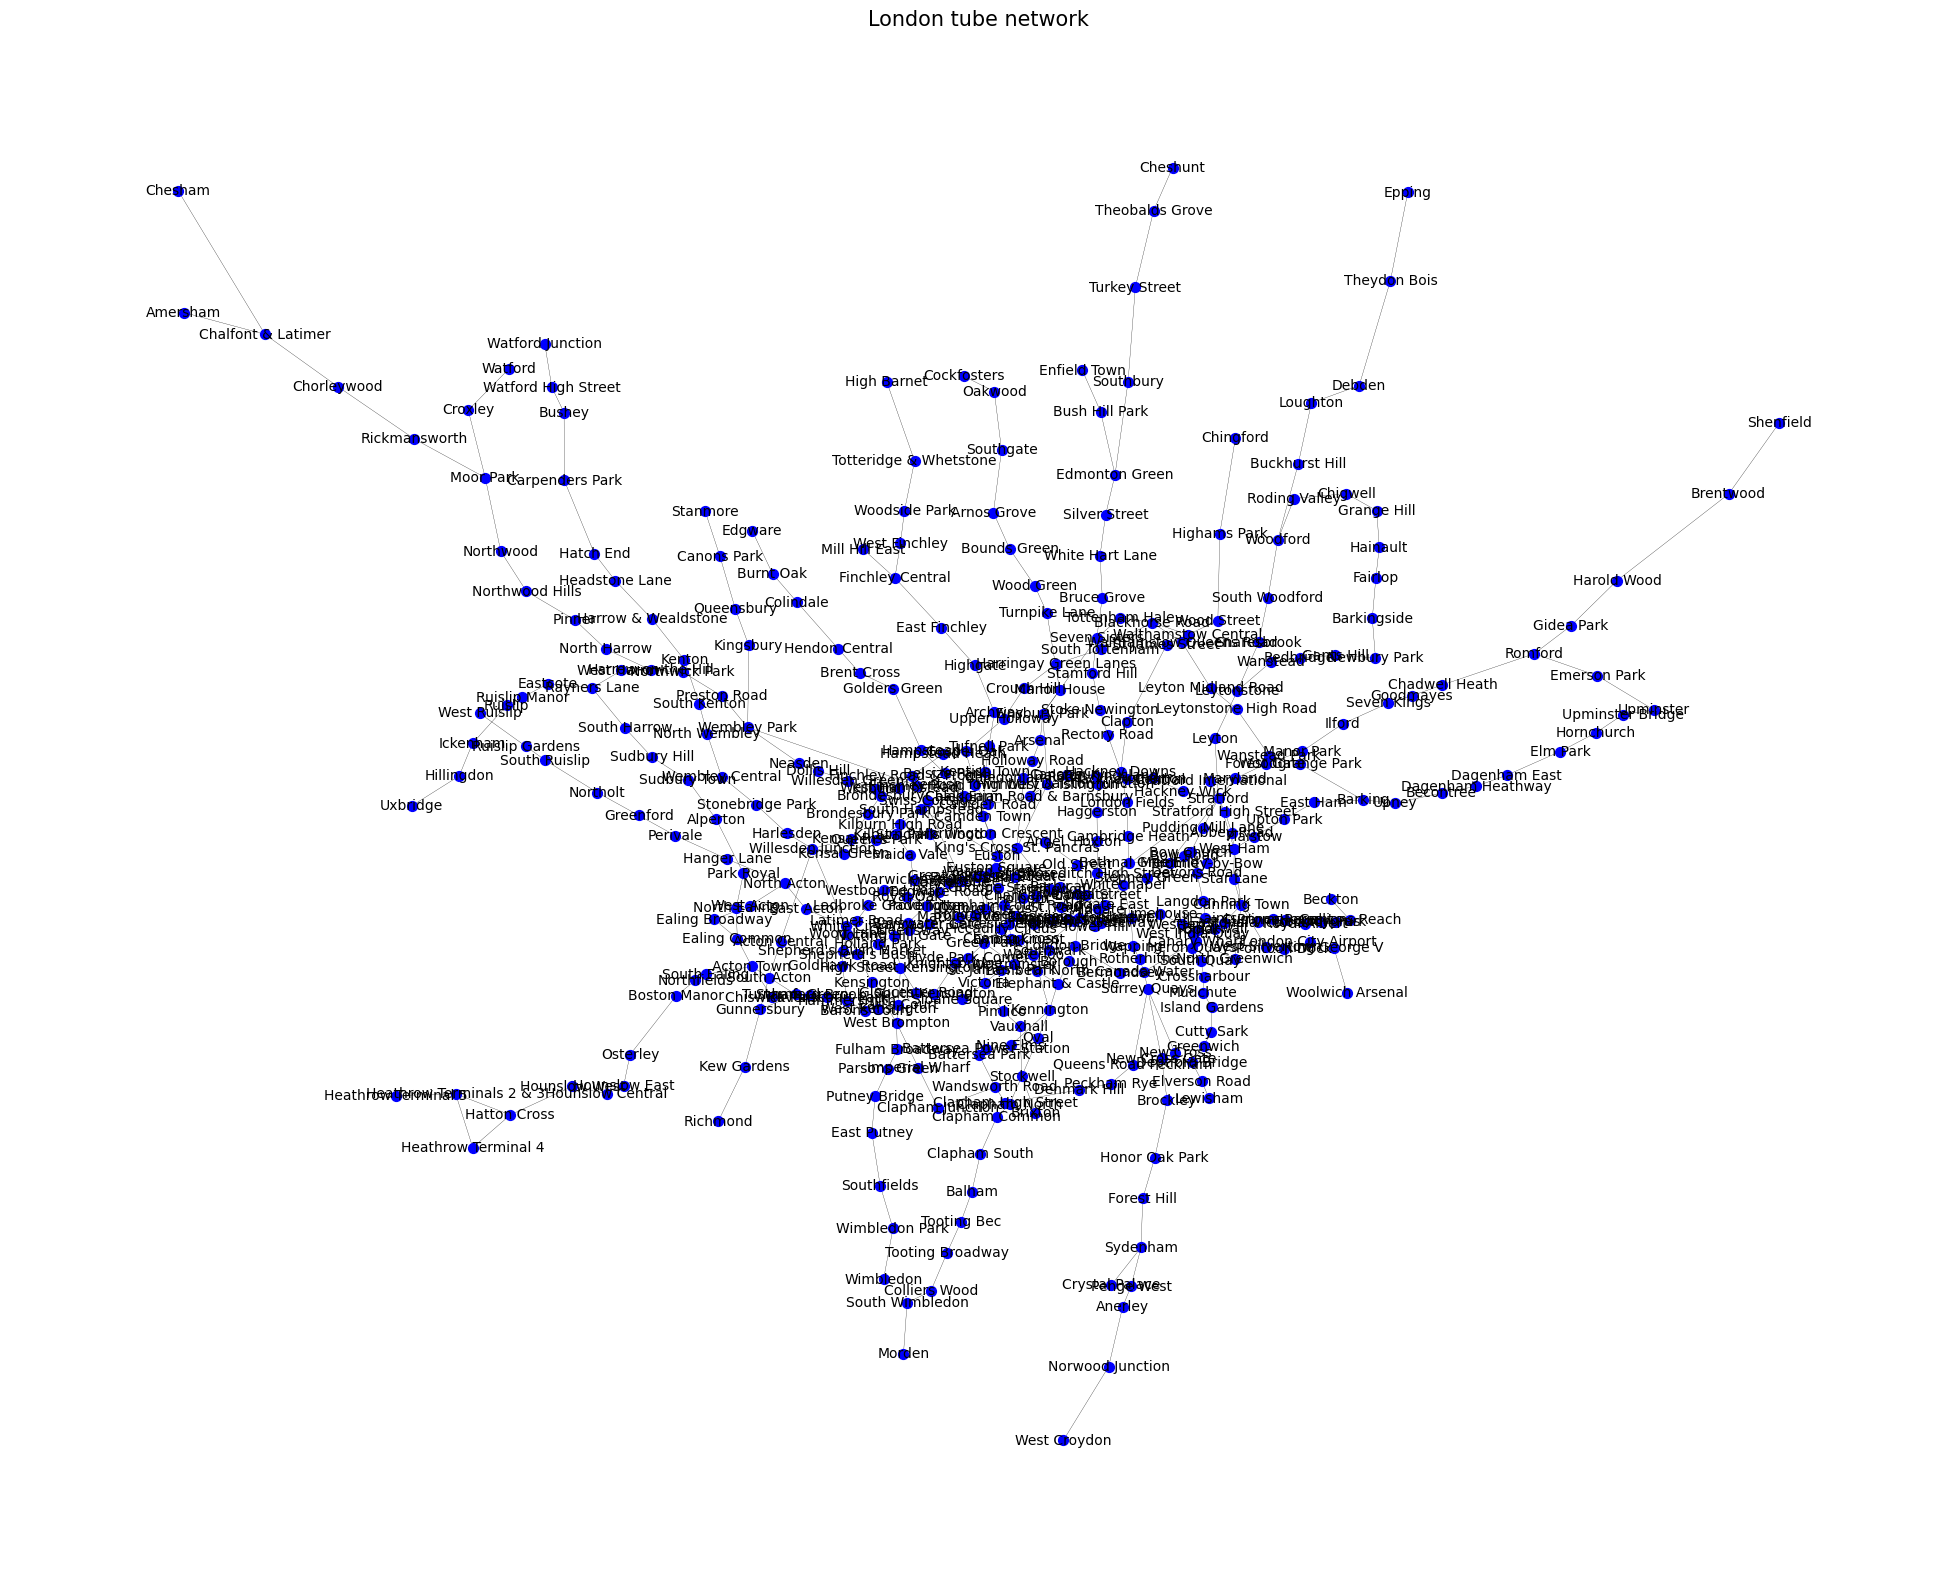

In [10]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = {node:node for node in G.nodes()}

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,flows,line_name,length
0,West Acton,Ealing Broadway,8715,Central,1616.902167
1,West Acton,North Acton,9761,Central,1811.494775
2,Ealing Broadway,Ealing Common,10022,District,1565.297083
3,North Acton,Hanger Lane,14837,Central,2454.293349
4,North Acton,East Acton,26802,Central,1180.519316
5,West Ruislip,Ruislip Gardens,1277,Central,2124.393196
6,Ruislip Gardens,South Ruislip,2279,Central,885.885726
7,South Ruislip,Northolt,3810,Central,2323.990521
8,Northolt,Greenford,7682,Central,1818.466260
9,Greenford,Perivale,10792,Central,1596.435121


## I.1. Centrality measures:

To evaluate the resilience of London's underground network and identify its most crucial stations, we utilize three centrality measures: **degree centrality**, **betweenness centrality**, and **closeness centrality**. These measures provide different perspectives on a node's (in this case, a station's) importance within the network. Below are the definitions, equations, and their relevance to the underground network.

### 1. Degree Centrality

- **Definition**: Degree centrality measures the number of direct connections a node has with other nodes in the network. It indicates a node's activity level or popularity.

- **Equation**: For a node $v$, degree centrality $C_D(v)$ is defined as:
  
  $$ C_D(v) = \frac{\text{deg}(v)}{N-1} $$
  
  where $\text{deg}(v)$ is the degree of node $v$ (the number of connections it has), and $N-1$ is the total possible connections to all other nodes ($N$ is the total number of nodes in the network).

- **Underground Context**: In the London Underground, a station with high degree centrality interacts with many other stations directly through routes. Such stations are pivotal transfer points or hubs, facilitating significant passenger flow and connectivity across the network.

### 2. Betweenness Centrality

- **Definition**: Betweenness centrality quantifies how often a node acts as a bridge along the shortest path between two other nodes. It highlights nodes critical for the flow of information (or passengers) in the network.

- **Equation**: The betweenness centrality $C_B(v)$ of a node $v$ is given by:
  
  $$ C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}} $$
  
  where $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$, and $\sigma_{st}(v)$ is the number of those paths passing through $v$, excluding $s$ and $t$ when $v$ equals either.

- **Underground Context**: Stations with high betweenness centrality are critical for maintaining network efficiency, acting as key connectors. Their removal could significantly disrupt passenger flow, making it harder to find efficient routes between various parts of the city.

### 3. Closeness Centrality

- **Definition**: Closeness centrality measures how close a node is to all other nodes in the network, providing an estimate of how long it will take to spread information (or move passengers) from that node to others.

- **Equation**: The closeness centrality $C_C(v)$ of a node $v$ is calculated as:
  
  $$ C_C(v) = \frac{N-1}{\sum_{u=1}^{N-1} d(v,u)} $$
  
  where $d(v,u)$ is the shortest path distance between nodes $v$ and $u$, and $N-1$ represents the total other nodes.

- **Underground Context**: In the underground network, stations with high closeness centrality are efficiently located, minimizing travel time to all other stations. These strategically placed stations can significantly enhance network resilience and passenger convenience by offering quicker access to the entire system.

By analyzing these centrality measures, we pinpoint stations that play pivotal roles in maintaining the connectivity, efficiency, and resilience of London's underground network. Identifying these critical stations is vital for prioritizing them for infrastructure improvements, emergency planning, and operational strategies to enhance the overall resilience of the underground system.
l resilience of the underground system.
l resilience of the underground system.
stem.
ce of the underground system.

---

In [12]:
### Topological degree centrality:

#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree_t')

In [13]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree_t'] = pd.Series(nx.get_node_attributes(G, 'degree_t'))

df_sorted = df.sort_values(["degree_t"], ascending=False)
df_sorted[0:10]

,degree_t
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Liverpool Street,0.0150
Oxford Circus,0.0150
Canning Town,0.0150
Waterloo,0.0150
Earl's Court,0.0150
West Ham,0.0150


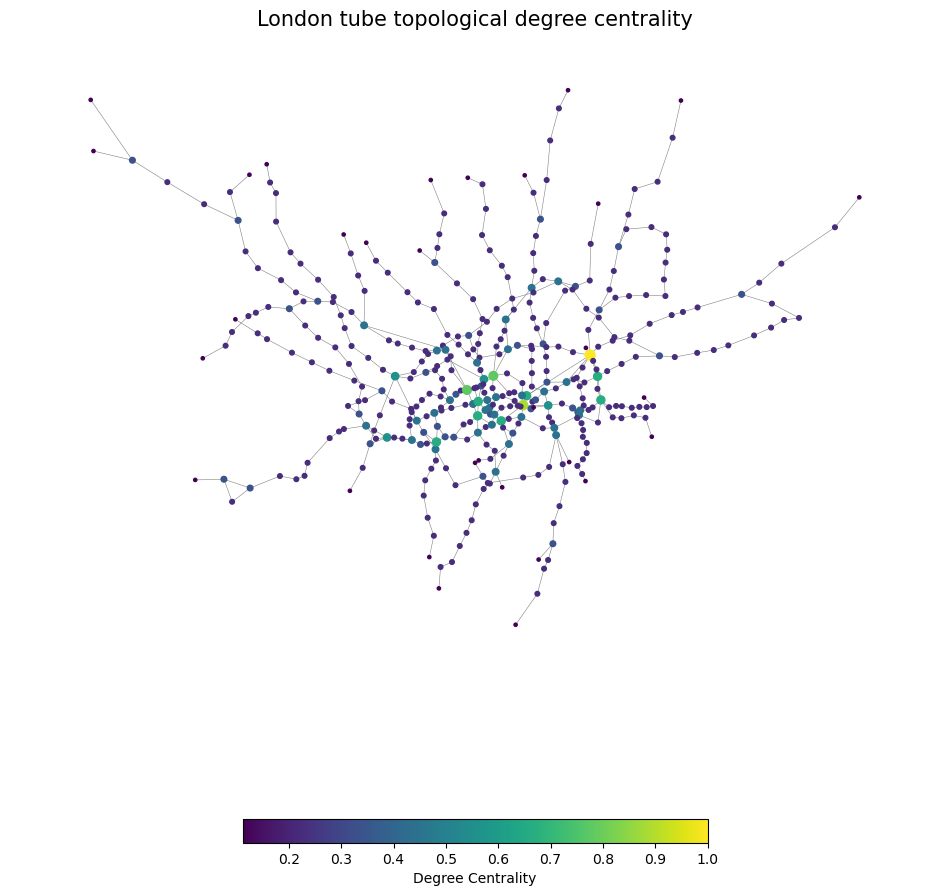

In [14]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree_t']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree_t']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree_t']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological degree centrality",fontsize=15)
plt.show()

In [15]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


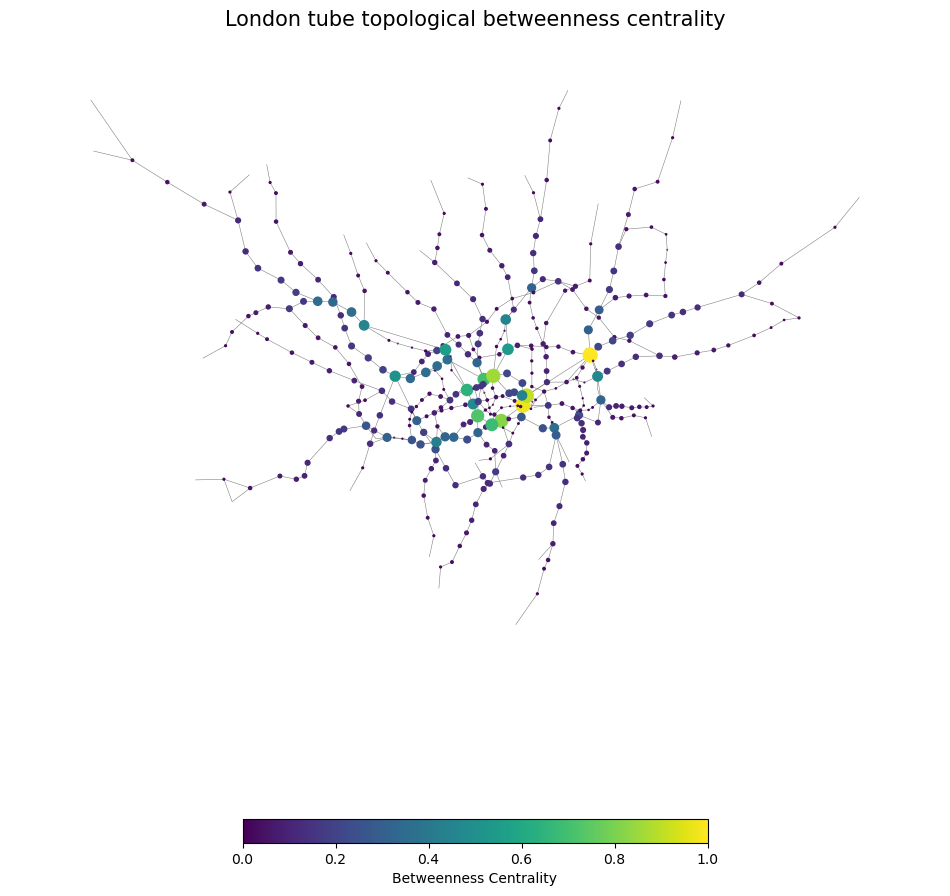

In [16]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

In [17]:
### Topological closeness centrality:
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


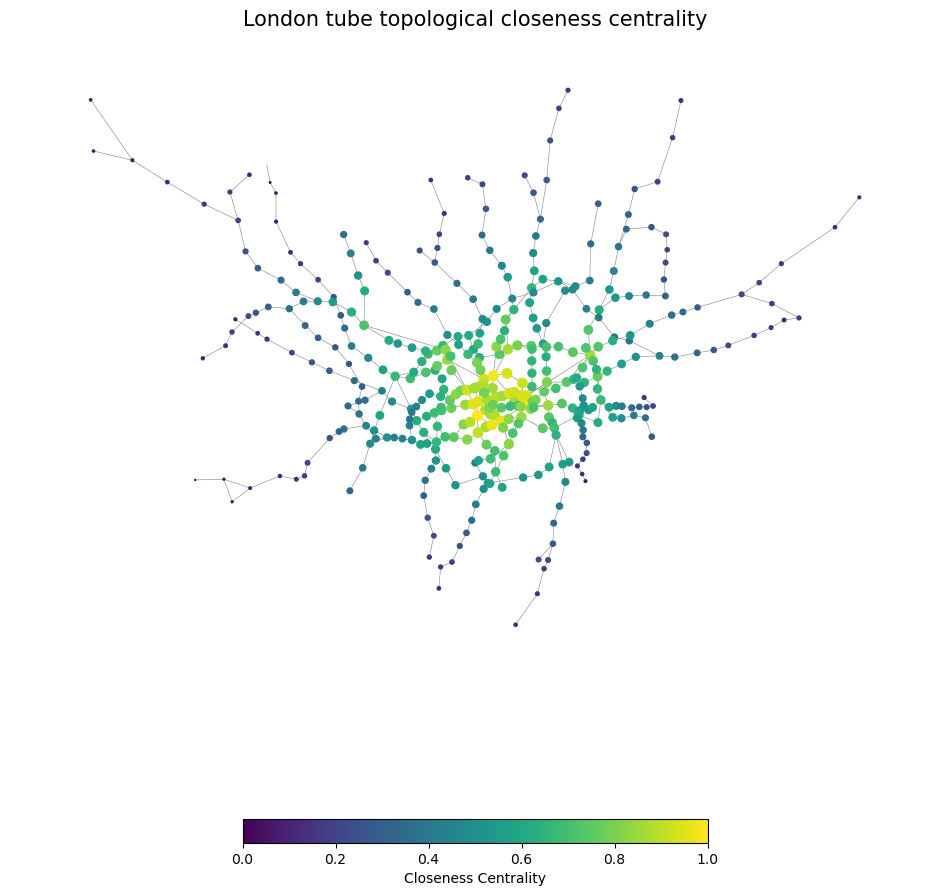

In [18]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [19]:
# To check node attributes
list(G.nodes(data=True))[0:5]

[('West Acton',
  {'coords': (519396.49661771354, 181320.53600355436),
   'degree_t': 0.005,
   'betweenness_t': 659.7,
   'closeness_t': 0.06906077348066299}),
 ('Ealing Broadway',
  {'coords': (517952.06193833845, 180930.32080099251),
   'degree_t': 0.005,
   'betweenness_t': 542.3333333333334,
   'closeness_t': 0.0673854447439353}),
 ('North Acton',
  {'coords': (520831.6447646859, 181956.23485728912),
   'degree_t': 0.0075,
   'betweenness_t': 3321.1999999999994,
   'closeness_t': 0.07268762493185535}),
 ('West Ruislip',
  {'coords': (508377.63766211295, 186796.26829912647),
   'degree_t': 0.0025,
   'betweenness_t': 0.0,
   'closeness_t': 0.0484613520717228}),
 ('Ruislip Gardens',
  {'coords': (510274.96303267614, 185847.93603156926),
   'degree_t': 0.005,
   'betweenness_t': 399.0,
   'closeness_t': 0.050922978994271166})]

## I.2. Impact measures:

## Global Impact Measures for Network Analysis

Evaluating the impact of node removal on a network's functionality and resilience can be done through various global measures. These measures provide insights into how the network's structure and efficiency are affected by the removal of nodes. Below, we describe several global impact measures, their definitions, formulas, and applicability to networks like the London Underground or any other network.#

## 1. Average Shortest Path Length

- **Definition**: The average of the shortest path lengths between all pairs of nodes in the network. It reflects the average number of steps required to travel from one node to another across the network.

- **Formula**:
  $$
  L = \frac{1}{n(n-1)}\sum_{i \neq j}d(v_i, v_j)
  $$
  where $d(v_i, v_j)$ is the shortest path length between nodes $v_i$ and $v_j$, and $n$ is the total number of nodes in the network.

- **Impact of Node Removal**: Removing a node may increase the average shortest path length, indicating a decrease in the network's overall efficiency and connectivity.

- **Specific to London Underground?**: No. This measure is applicable to any network where the path length between nodes is a re#levant metric.

## 2. Network Efficiency

- **Definition**: A measure of how efficiently the network facilitates the flow of information or traffic between its nodes, considering the inverse of the shortest path lengths between all pairs of nodes.

- **Formula**:
  $$
  E = \frac{1}{n(n-1)} \sum_{i \neq j \in N} \frac{1}{d(v_i, v_j)}
  $$
  where $d(v_i, v_j)$ is the shortest path length between nodes $v_i$ and $v_j$, and $n$ is the total number of nodes.

- **Impact of Node Removal**: An increase in the network efficiency indicates better connectivity and resilience, while a decrease suggests the network has become less efficient at facilitating flows.

- **Specific to London Underground?**: No. This is a universal measure for assessing th#e efficiency of any network.

## 3. Network Diameter

- **Definition**: The length of the longest shortest path between any two nodes in the network. It represents the "farthest" distance between any two nodes in the network.

- **Formula**:
  $$
  D = \max_{i \neq j} d(v_i, v_j)
  $$
  where $d(v_i, v_j)$ is the shortest path length between nodes $v_i$ and $v_j$.

- **Impact of Node Removal**: An increase in the network diameter can indicate that the network has become less compact, potentially reducing its efficiency.

- **Specific to London Underground?**: No. Like the other measures, the network diameter is a general concept used in network an#alysis across different types of networks.

## 4. Connected Components

- **Definition**: In an undirected graph, a connected component is a subgraph in which any two nodes are connected to each other by paths.

- **Impact of Node Removal**: An increase in the number of connected components after node removal indicates a fragmentation of the network, which can significantly impact its overall connectivity and resilience.

- **Specific to London Underground?**: No. Assessing the connected components is a fundamental aspect of unde#rstanding the structural integrity of any network.

## Analysis

These global impact measures provide a comprehensive toolkit for analyzing the effects of node removal on a network. By evaluating changes in these measures before and after node removal, we can assess the impact on network functionality and identify critical nodes whose removal would significantly disrupt network performance. While these measures are not specific to the London Underground network, they are particularly relevant for analyzing transport networks where connectivity and flow efficiency are critical.


## I.3. Node removal:

## Degree Centrality

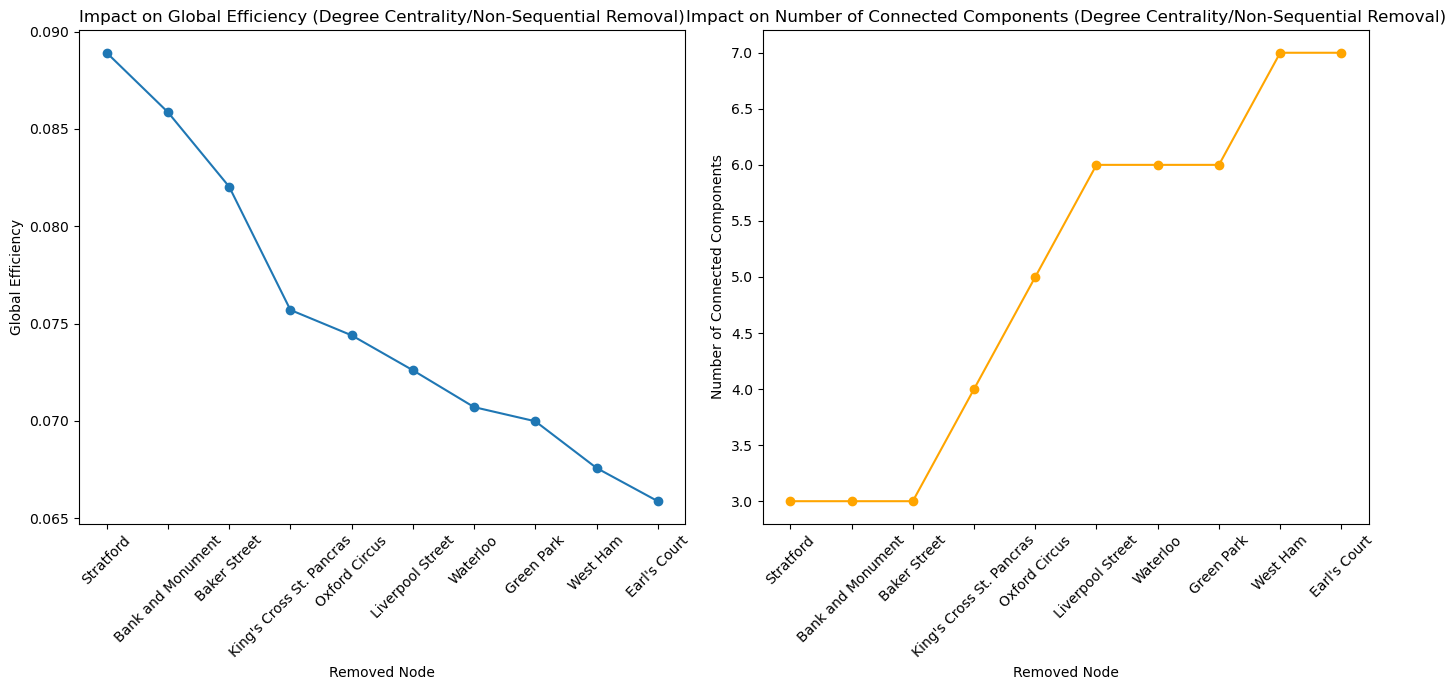

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1         Bank and Monument           0.085862                               3
2              Baker Street           0.082033                               3
3  King's Cross St. Pancras           0.075700                               4
4             Oxford Circus           0.074396                               5
5          Liverpool Street           0.072601                               6
6                  Waterloo           0.070707                               6
7                Green Park           0.069979                               6
8                  West Ham           0.067579                               7
9              Earl's Court           0.065872                               7


In [20]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality
sorted_nodes_by_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_nodes_by_degree = [node for node, _ in sorted_nodes_by_degree[:10]]

# Prepare to store the results
results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Make a copy of the graph to manipulate
G_copy = G.copy()

# Remove nodes non-sequentially and calculate the measures
for node in top_10_nodes_by_degree:
    # Remove the node
    G_copy.remove_node(node)
    
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G_copy)
    
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G_copy)
    
    # Append the results
    results['removed_node'].append(node)
    results['global_efficiency'].append(efficiency)
    results['number_of_connected_components'].append(num_connected_components)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the impact of node removal on global efficiency and number of connected components
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global efficiency plot
axs[0].plot(results_df['removed_node'], results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Degree Centrality/Non-Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)

# Number of connected components plot
axs[1].plot(results_df['removed_node'], results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Degree Centrality/Non-Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save results to a CSV file
results_df.to_csv('degree_centrality_non_sequential_removal_impact.csv', index=False)

# Display the DataFrame
print(results_df)

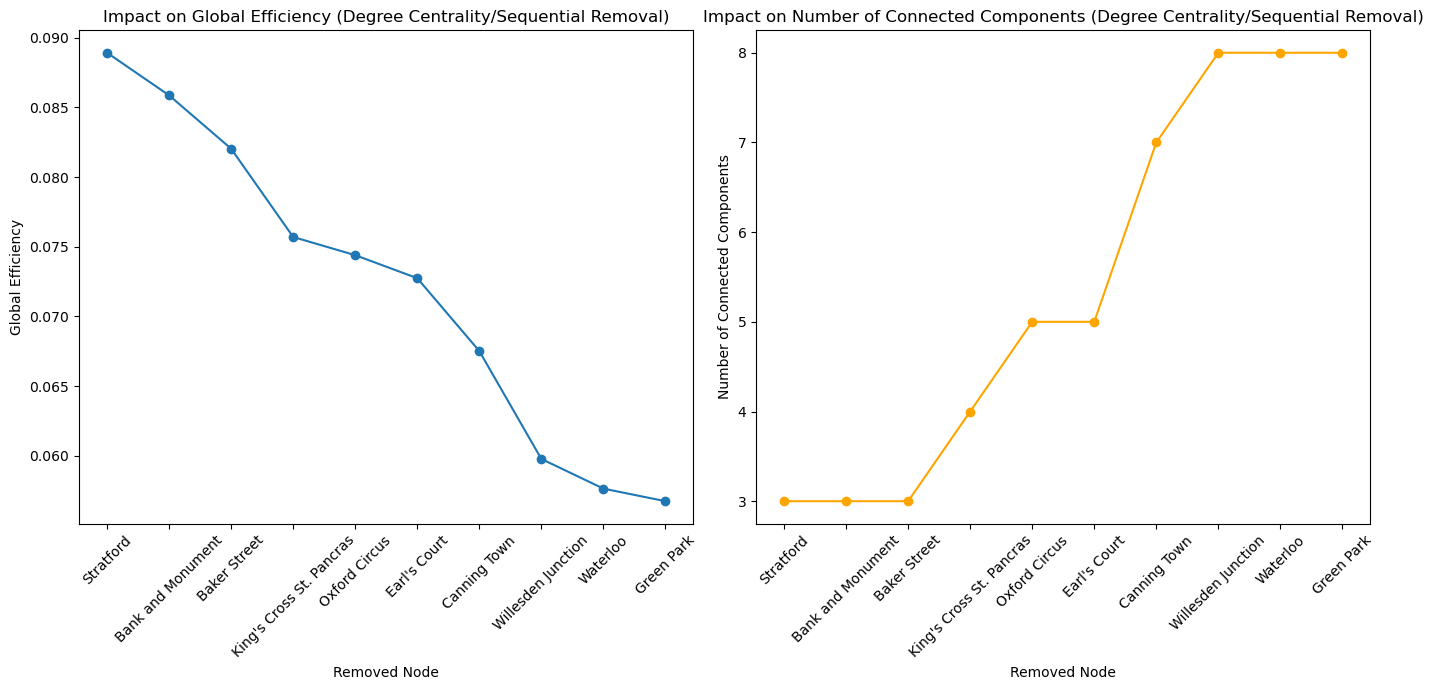

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1         Bank and Monument           0.085862                               3
2              Baker Street           0.082033                               3
3  King's Cross St. Pancras           0.075700                               4
4             Oxford Circus           0.074396                               5
5              Earl's Court           0.072745                               5
6              Canning Town           0.067520                               7
7        Willesden Junction           0.059779                               8
8                  Waterloo           0.057650                               8
9                Green Park           0.056748                               8


In [21]:
# Function to calculate global efficiency and connected components
def evaluate_impact(G):
    efficiency = nx.global_efficiency(G)
    num_components = nx.number_connected_components(G)
    return efficiency, num_components

# Store the results
sequential_results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Work on a copy of the graph to avoid modifying the original graph
G_sequential = G.copy()

# Sequentially remove nodes and recompute degree centrality
for _ in range(10):
    # Compute degree centrality
    degree_centrality = nx.degree_centrality(G_sequential)
    # Find the node with the highest degree centrality
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    
    # Remove the node with the highest centrality
    G_sequential.remove_node(max_degree_node)
    
    # Evaluate impact
    efficiency, num_components = evaluate_impact(G_sequential)
    
    # Append results
    sequential_results['removed_node'].append(max_degree_node)
    sequential_results['global_efficiency'].append(efficiency)
    sequential_results['number_of_connected_components'].append(num_components)

# Convert results to DataFrame
sequential_results_df = pd.DataFrame(sequential_results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global Efficiency plot
axs[0].plot(sequential_results_df['removed_node'], sequential_results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Degree Centrality/Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of Connected Components plot
axs[1].plot(sequential_results_df['removed_node'], sequential_results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Degree Centrality/Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save to CSV
sequential_results_df.to_csv('sequential_removal_impact.csv', index=False)

# Print DataFrame
print(sequential_results_df)


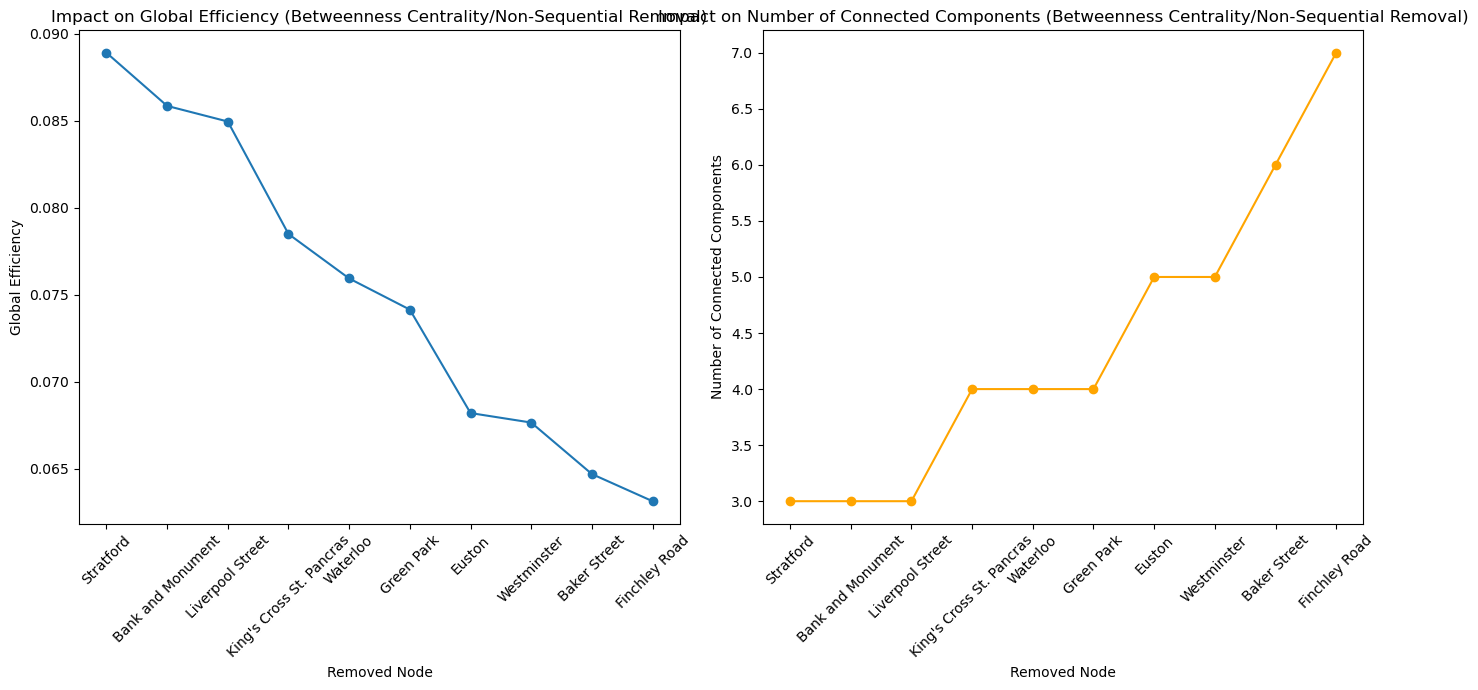

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1         Bank and Monument           0.085862                               3
2          Liverpool Street           0.084963                               3
3  King's Cross St. Pancras           0.078498                               4
4                  Waterloo           0.075942                               4
5                Green Park           0.074152                               4
6                    Euston           0.068206                               5
7               Westminster           0.067660                               5
8              Baker Street           0.064700                               6
9             Finchley Road           0.063139                               7


In [22]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality
sorted_nodes_by_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_nodes_by_betweenness = [node for node, _ in sorted_nodes_by_betweenness[:10]]

# Prepare to store the results
results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Make a copy of the graph to manipulate
G_copy = G.copy()

# Remove nodes non-sequentially based on betweenness centrality and calculate the measures
for node in top_10_nodes_by_betweenness:
    # Remove the node
    G_copy.remove_node(node)
    
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G_copy)
    
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G_copy)
    
    # Append the results
    results['removed_node'].append(node)
    results['global_efficiency'].append(efficiency)
    results['number_of_connected_components'].append(num_connected_components)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the impact of node removal on global efficiency and number of connected components
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global efficiency plot
axs[0].plot(results_df['removed_node'], results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Betweenness Centrality/Non-Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)

# Number of connected components plot
axs[1].plot(results_df['removed_node'], results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Betweenness Centrality/Non-Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save results to a CSV file
results_df.to_csv('betweenness_centrality_non_sequential_removal_impact.csv', index=False)

# Display the DataFrame
print(results_df)


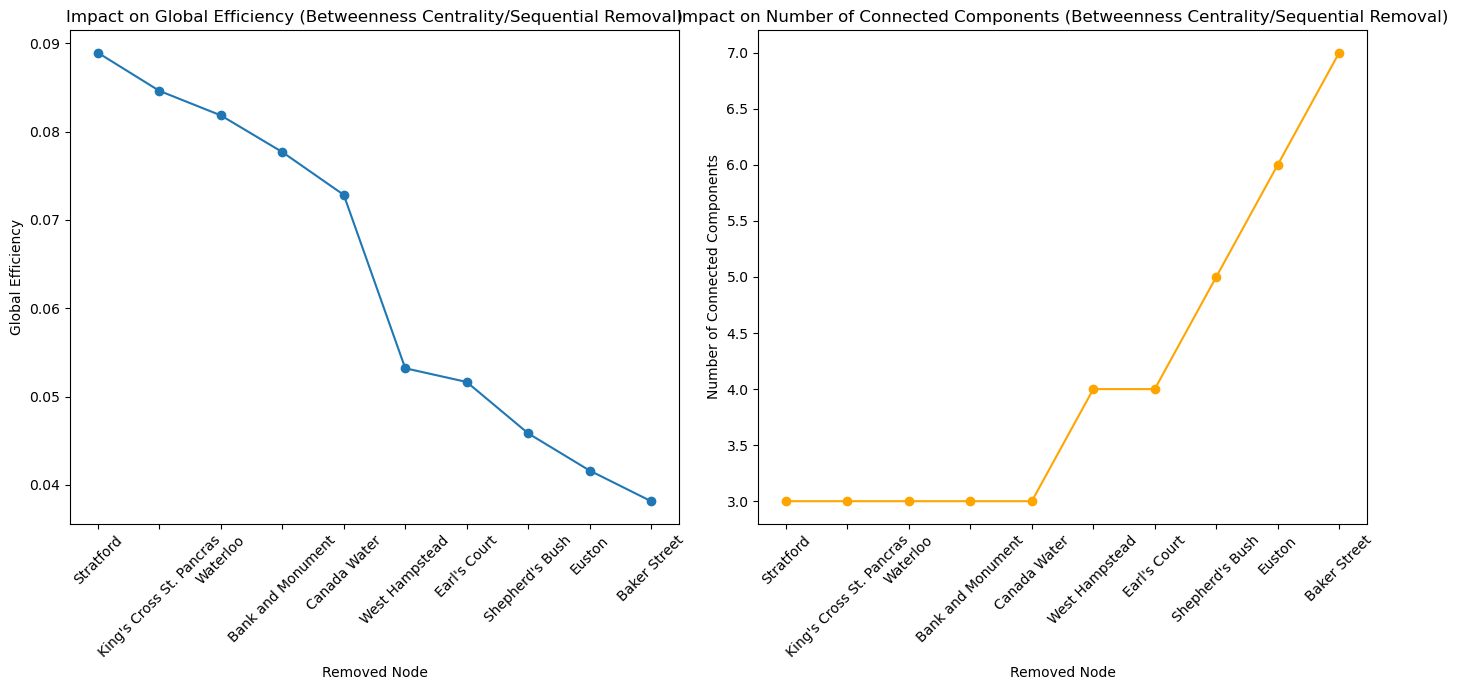

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1  King's Cross St. Pancras           0.084603                               3
2                  Waterloo           0.081829                               3
3         Bank and Monument           0.077678                               3
4              Canada Water           0.072832                               3
5            West Hampstead           0.053210                               4
6              Earl's Court           0.051656                               4
7           Shepherd's Bush           0.045844                               5
8                    Euston           0.041631                               6
9              Baker Street           0.038164                               7


In [23]:
# Function to calculate global efficiency and connected components
def evaluate_impact(G):
    efficiency = nx.global_efficiency(G)
    num_components = nx.number_connected_components(G)
    return efficiency, num_components

# Store the results
sequential_results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Work on a copy of the graph to avoid modifying the original graph
G_sequential = G.copy()

# Sequentially remove nodes and recompute betweenness centrality
for _ in range(10):
    # Compute betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G_sequential)
    # Find the node with the highest betweenness centrality
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    
    # Remove the node with the highest centrality
    G_sequential.remove_node(max_betweenness_node)
    
    # Evaluate impact
    efficiency, num_components = evaluate_impact(G_sequential)
    
    # Append results
    sequential_results['removed_node'].append(max_betweenness_node)
    sequential_results['global_efficiency'].append(efficiency)
    sequential_results['number_of_connected_components'].append(num_components)

# Convert results to DataFrame
sequential_results_df = pd.DataFrame(sequential_results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global Efficiency plot
axs[0].plot(sequential_results_df['removed_node'], sequential_results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Betweenness Centrality/Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of Connected Components plot
axs[1].plot(sequential_results_df['removed_node'], sequential_results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Betweenness Centrality/Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save to CSV
sequential_results_df.to_csv('sequential_betweenness_removal_impact.csv', index=False)

# Print DataFrame
print(sequential_results_df)

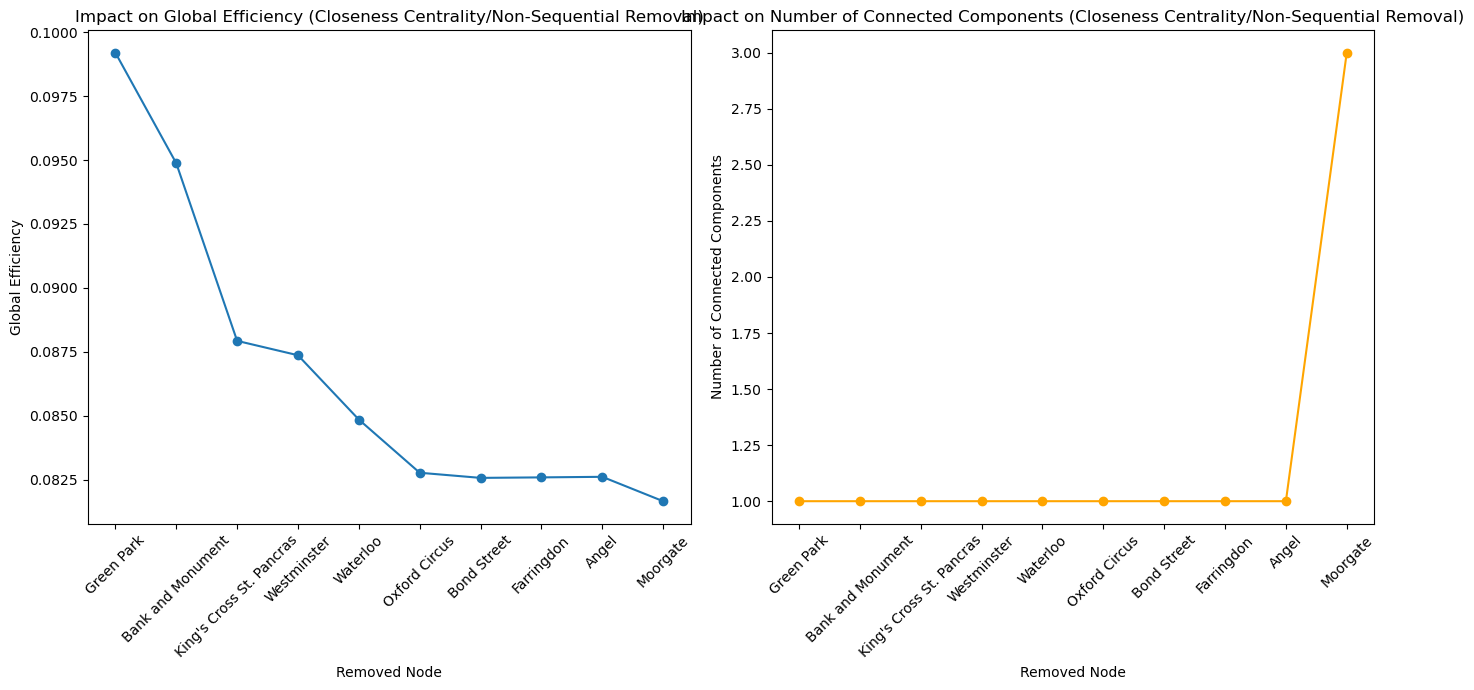

               removed_node  global_efficiency  number_of_connected_components
0                Green Park           0.099190                               1
1         Bank and Monument           0.094872                               1
2  King's Cross St. Pancras           0.087934                               1
3               Westminster           0.087372                               1
4                  Waterloo           0.084859                               1
5             Oxford Circus           0.082781                               1
6               Bond Street           0.082581                               1
7                Farringdon           0.082600                               1
8                     Angel           0.082622                               1
9                  Moorgate           0.081670                               3


In [24]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort nodes by closeness centrality
sorted_nodes_by_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_nodes_by_closeness = [node for node, _ in sorted_nodes_by_closeness[:10]]

# Prepare to store the results
results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Make a copy of the graph to manipulate
G_copy = G.copy()

# Remove nodes non-sequentially based on closeness centrality and calculate the measures
for node in top_10_nodes_by_closeness:
    # Remove the node
    G_copy.remove_node(node)
    
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G_copy)
    
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G_copy)
    
    # Append the results
    results['removed_node'].append(node)
    results['global_efficiency'].append(efficiency)
    results['number_of_connected_components'].append(num_connected_components)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the impact of node removal on global efficiency and number of connected components
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global efficiency plot
axs[0].plot(results_df['removed_node'], results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Closeness Centrality/Non-Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of connected components plot
axs[1].plot(results_df['removed_node'], results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Closeness Centrality/Non-Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save results to a CSV file
results_df.to_csv('closeness_centrality_non_sequential_removal_impact.csv', index=False)

# Display the DataFrame
print(results_df)


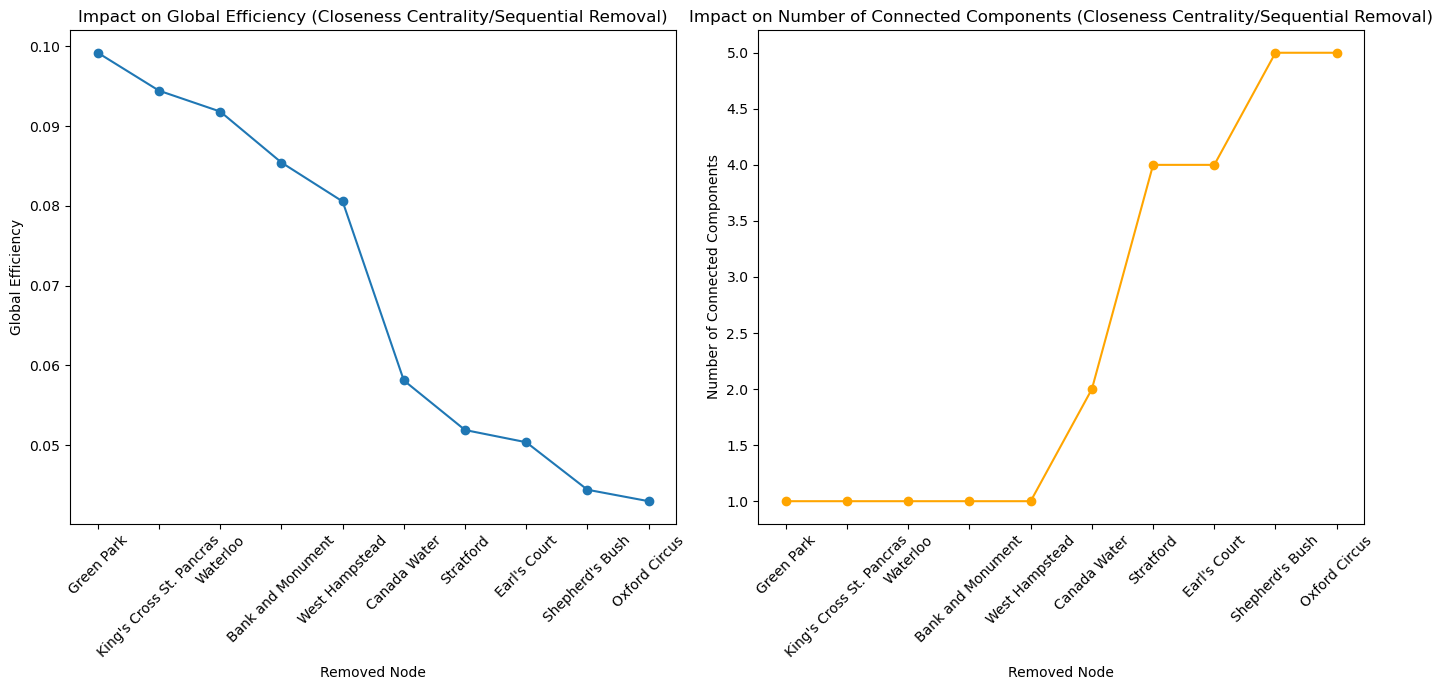

               removed_node  global_efficiency  number_of_connected_components
0                Green Park           0.099190                               1
1  King's Cross St. Pancras           0.094435                               1
2                  Waterloo           0.091816                               1
3         Bank and Monument           0.085426                               1
4            West Hampstead           0.080544                               1
5              Canada Water           0.058101                               2
6                 Stratford           0.051884                               4
7              Earl's Court           0.050350                               4
8           Shepherd's Bush           0.044395                               5
9             Oxford Circus           0.042958                               5


In [25]:
# Function to calculate global efficiency and connected components
def evaluate_impact(G):
    efficiency = nx.global_efficiency(G)
    num_components = nx.number_connected_components(G)
    return efficiency, num_components

# Store the results
sequential_results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Work on a copy of the graph to avoid modifying the original graph
G_sequential = G.copy()

# Sequentially remove nodes and recompute closeness centrality
for _ in range(10):
    # Compute closeness centrality
    closeness_centrality = nx.closeness_centrality(G_sequential)
    # Find the node with the highest closeness centrality
    max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
    
    # Remove the node with the highest centrality
    G_sequential.remove_node(max_closeness_node)
    
    # Evaluate impact
    efficiency, num_components = evaluate_impact(G_sequential)
    
    # Append results
    sequential_results['removed_node'].append(max_closeness_node)
    sequential_results['global_efficiency'].append(efficiency)
    sequential_results['number_of_connected_components'].append(num_components)

# Convert results to DataFrame
sequential_results_df = pd.DataFrame(sequential_results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global Efficiency plot
axs[0].plot(sequential_results_df['removed_node'], sequential_results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Closeness Centrality/Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of Connected Components plot
axs[1].plot(sequential_results_df['removed_node'], sequential_results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Closeness Centrality/Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save to CSV
sequential_results_df.to_csv('sequential_closeness_removal_impact.csv', index=False)

# Print DataFrame
print(sequential_results_df)


## Non-Sequential Removal:
Global Efficiency: For degree and betweenness centrality, the plots show a clear downward trend in global efficiency as nodes are removed, which indicates that the removal of highly central nodes significantly decreases the efficiency of the network. This is expected since these nodes play a crucial role in maintaining short paths across the network. Closeness centrality also follows this trend but with a steeper initial decline, suggesting that nodes ranked highly by closeness centrality may have a more pronounced immediate effect on efficiency when removed.

Number of Connected Components: In the non-sequential removal strategy, the number of connected components remains stable initially and then rises sharply for degree and betweenness centrality, highlighting that the network remains relatively cohesive until a tipping point is reached. In contrast, closeness centrality leads to a sudden increase in connected components with the removal of fewer nodes, indicating a potential higher impact on network cohesion.

## Sequential Removal:
Global Efficiency: Sequential removals show a consistent decline in global efficiency for all centrality measures. It's noticeable that efficiency tends to drop faster in the sequential strategy compared to non-sequential. This suggests that recalculating centrality and removing the most central node each time can disrupt the network more severely, as each removal may cause a reconfiguration of the remaining network structure that exacerbates the impact.

Number of Connected Components: The sequential removal strategy results in a more pronounced increase in the number of connected components, especially noticeable with betweenness centrality. This could imply that the sequential removal of nodes, particularly those that bridge different parts of the network, leads to fragmentation more quickly.

## Critical Discussion:
Centrality Measure: Betweenness centrality appears to have a significant impact on both global efficiency and network cohesion, which may indicate its effectiveness in identifying crucial nodes whose removal leads to substantial network disruption. Degree centrality also shows a clear impact, but it may not capture the critical pathways as effectively as betweenness centrality. Closeness centrality's impact, particularly on network cohesion, suggests that it identifies nodes that maintain the network's overall connectedness.

Removal Strategy: The sequential strategy seems to be more effective at revealing the network's resilience, as it continually targets the most central nodes based on the network's evolving structure. This strategy might be more representative of real-world scenarios where network dynamics are constantly changing.

Impact Measure: Global efficiency is a sensitive measure of the overall network performance, capturing the ability of the network to maintain efficient communication. The number of connected components is a stark indicator of network fragmentation. While both are valuable, global efficiency might provide a more nuanced understanding of the network's functioning and resilience.

In [26]:
def evaluate_impact(graph):
    """Calculate global efficiency and the number of connected components."""
    efficiency = nx.global_efficiency(graph)
    num_components = nx.number_connected_components(graph)
    return efficiency, num_components

def remove_nodes_and_evaluate(G_original, centrality_measure, strategy):
    """Remove nodes based on centrality and evaluate the impact."""
    results = {
        'strategy': strategy,
        'centrality_measure': centrality_measure,
        'removed_node': [],
        'global_efficiency': [],
        'number_of_connected_components': []
    }

    # Make a fresh copy of the graph for each centrality measure and strategy
    G_temp = G_original.copy()
    removed_nodes = []

    for i in range(10):
        if strategy == 'sequential' or i == 0:  # Recompute centrality only for sequential or first iteration
            if centrality_measure == 'degree':
                centrality_scores = nx.degree_centrality(G_temp)
            elif centrality_measure == 'betweenness':
                centrality_scores = nx.betweenness_centrality(G_temp)
            elif centrality_measure == 'closeness':
                centrality_scores = nx.closeness_centrality(G_temp)

            # Sort nodes by centrality
            sorted_nodes = sorted(centrality_scores, key=lambda x: centrality_scores[x], reverse=True)

        # For non-sequential, avoid repeating removals
        node_to_remove = next(node for node in sorted_nodes if node not in removed_nodes)
        
        # Remove the selected node
        G_temp.remove_node(node_to_remove)
        removed_nodes.append(node_to_remove)  # Track removed nodes
        
        # Evaluate and store the impact
        efficiency, num_components = evaluate_impact(G_temp)
        results['removed_node'].append(node_to_remove)
        results['global_efficiency'].append(efficiency)
        results['number_of_connected_components'].append(num_components)

    return pd.DataFrame(results)

# Initialize an empty DataFrame to store all results
all_results_df = pd.DataFrame()

for centrality_measure in ['degree', 'betweenness', 'closeness']:
    for strategy in ['non-sequential', 'sequential']:
        results_df = remove_nodes_and_evaluate(G, centrality_measure, strategy)
        all_results_df = pd.concat([all_results_df, results_df], ignore_index=True)

# Display the combined DataFrame
print(all_results_df.head())

# Optional: Save to CSV for further analysis
all_results_df.to_csv('combined_removal_impact.csv', index=False)


         strategy centrality_measure              removed_node  \
0  non-sequential             degree                 Stratford   
1  non-sequential             degree         Bank and Monument   
2  non-sequential             degree              Baker Street   
3  non-sequential             degree  King's Cross St. Pancras   
4  non-sequential             degree             Oxford Circus   

   global_efficiency  number_of_connected_components  
0           0.088917                               3  
1           0.085862                               3  
2           0.082033                               3  
3           0.075700                               4  
4           0.074396                               5  


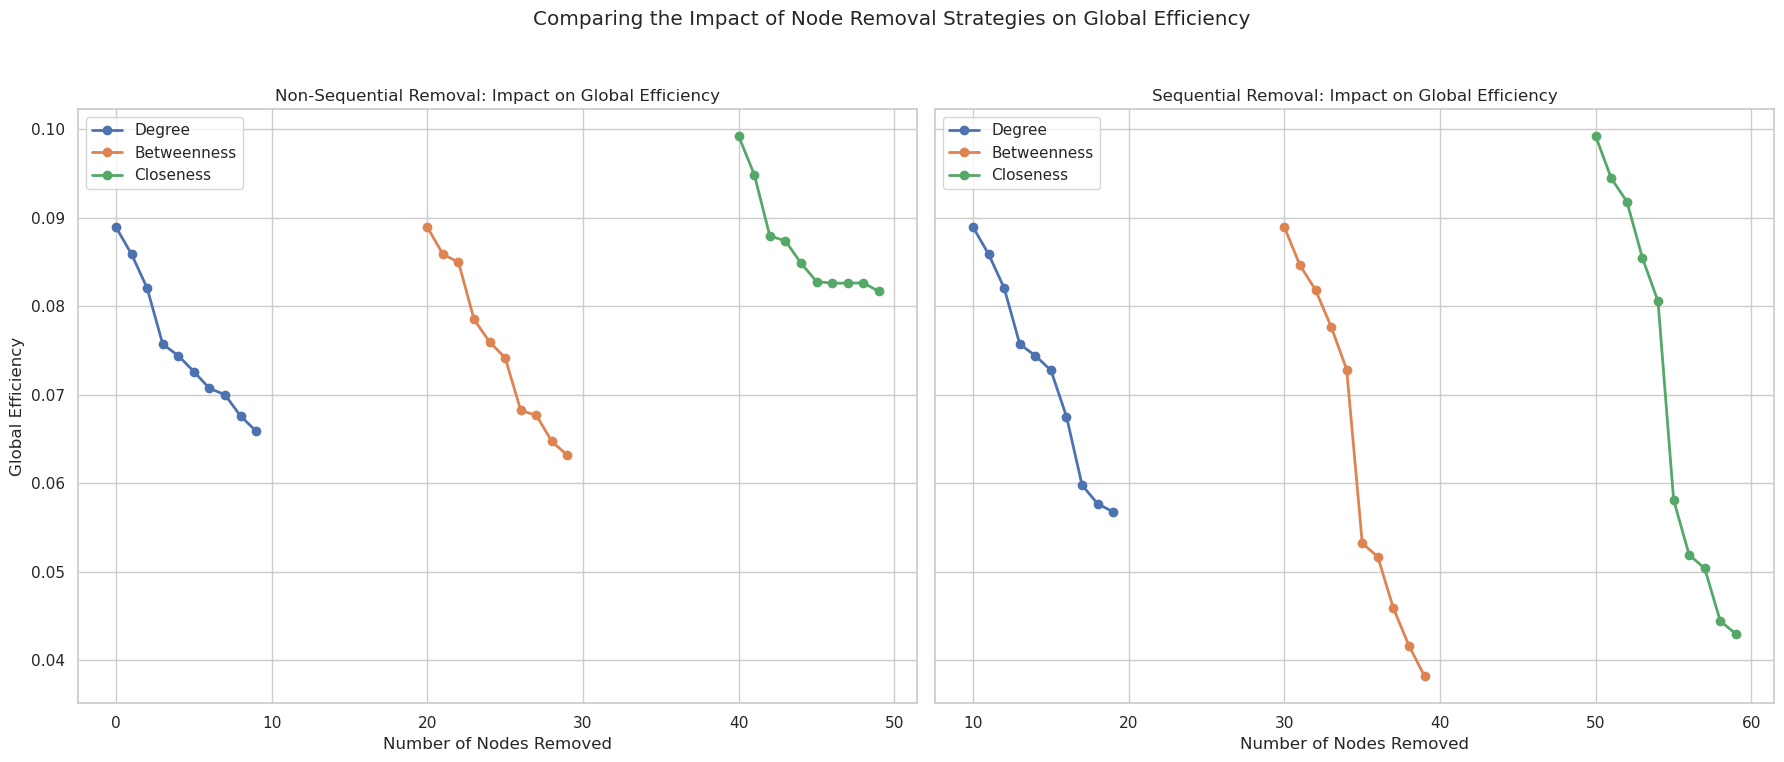

In [27]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Preparing the plot for both non-sequential and sequential strategies
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting for Non-Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'non-sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[0].plot(filtered_df.index[:10], filtered_df['global_efficiency'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Plotting for Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[1].plot(filtered_df.index[:10], filtered_df['global_efficiency'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Non-Sequential Removal: Impact on Global Efficiency')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Sequential Removal: Impact on Global Efficiency')
axs[1].set_xlabel('Number of Nodes Removed')
# axs[1].set_ylabel('Global Efficiency')  # Sharey is used
axs[1].legend()

plt.suptitle('Comparing the Impact of Node Removal Strategies on Global Efficiency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()

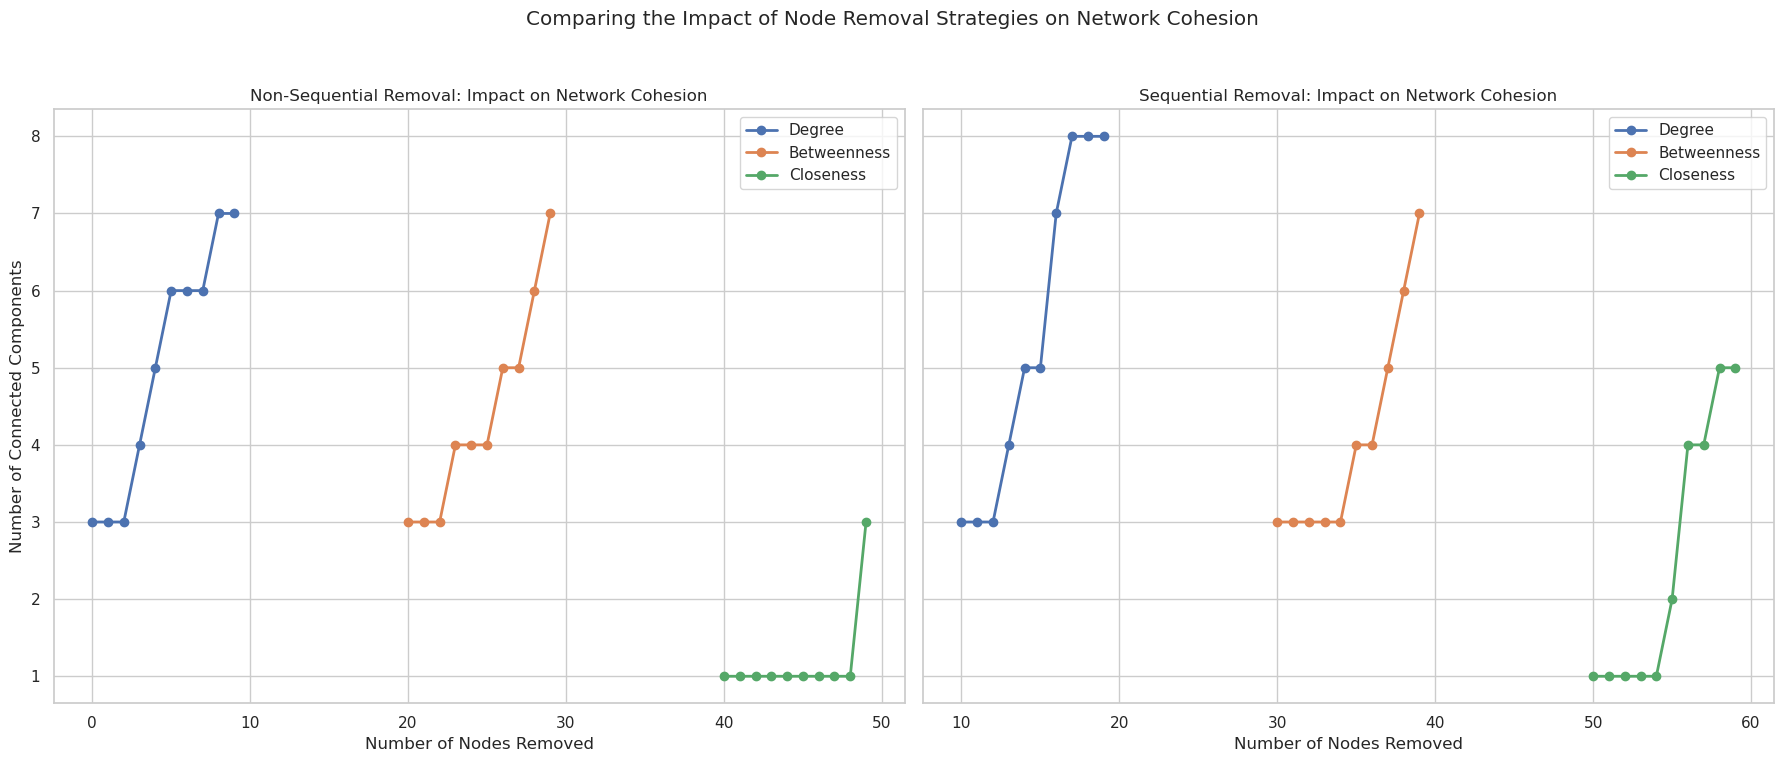

In [28]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Preparing the plot for both non-sequential and sequential strategies
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting for Non-Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'non-sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[0].plot(filtered_df.index[:10], filtered_df['number_of_connected_components'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Plotting for Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[1].plot(filtered_df.index[:10], filtered_df['number_of_connected_components'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Non-Sequential Removal: Impact on Network Cohesion')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Number of Connected Components')
axs[0].legend()

axs[1].set_title('Sequential Removal: Impact on Network Cohesion')
axs[1].set_xlabel('Number of Nodes Removed')
# axs[1].set_ylabel('Number of Connected Components')  # Sharey is used
axs[1].legend()

plt.suptitle('Comparing the Impact of Node Removal Strategies on Network Cohesion')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()


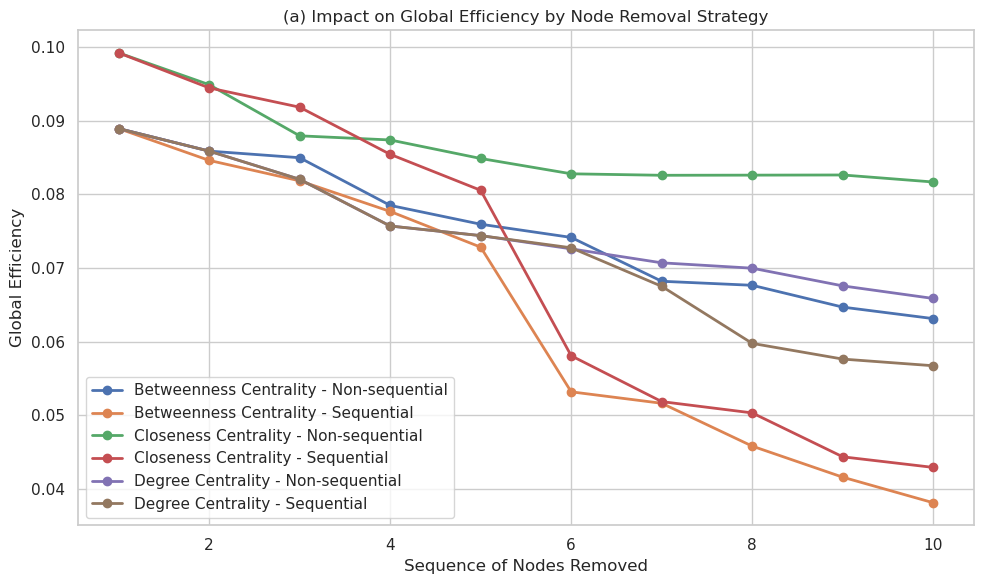

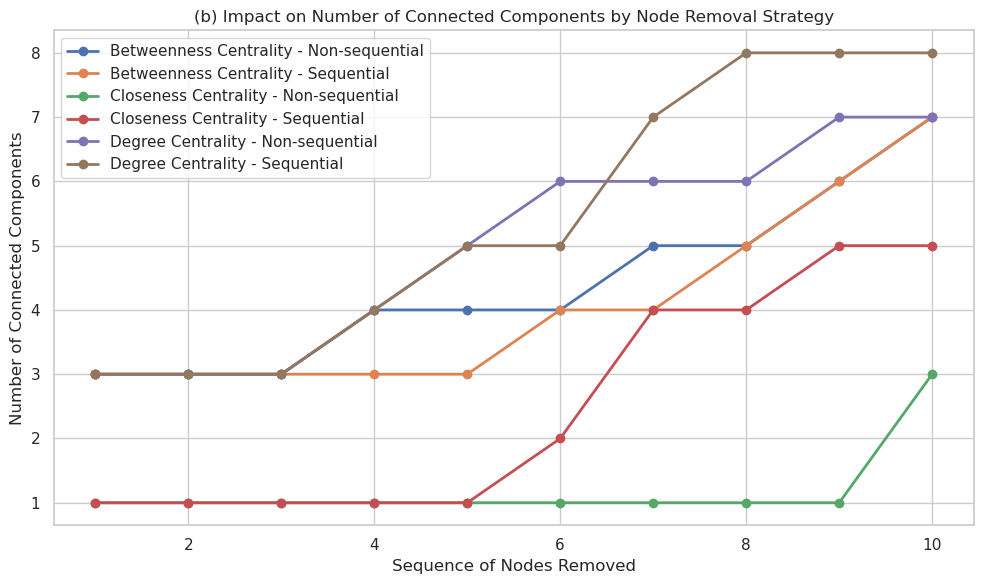

In [29]:
efficiency_plot_path = 'Data/global_efficiency_plot.png' 
components_plot_path = 'Data/connected_components_plot.png' 

# Plotting Global Efficiency and saving the figure
plt.figure(figsize=(10, 6))
for (centrality_measure, strategy), group_data in all_results_df.groupby(['centrality_measure', 'strategy']):
    standardized_label = f'{centrality_measure.capitalize()} Centrality - {strategy.capitalize()}'
    plt.plot(
        range(1, len(group_data) + 1),
        group_data['global_efficiency'],
        label=standardized_label,
        marker='o', linestyle='-', linewidth=2
    )
plt.title('(a) Impact on Global Efficiency by Node Removal Strategy')
plt.xlabel('Sequence of Nodes Removed')
plt.ylabel('Global Efficiency')
plt.legend()
plt.tight_layout()
plt.savefig(efficiency_plot_path)  # Save before showing
plt.show()
plt.close()

# Plotting Number of Connected Components and saving the figure
plt.figure(figsize=(10, 6))
for (centrality_measure, strategy), group_data in all_results_df.groupby(['centrality_measure', 'strategy']):
    standardized_label = f'{centrality_measure.capitalize()} Centrality - {strategy.capitalize()}'
    plt.plot(
        range(1, len(group_data) + 1),
        group_data['number_of_connected_components'],
        label=standardized_label,
        marker='o', linestyle='-', linewidth=2
    )
plt.title('(b) Impact on Number of Connected Components by Node Removal Strategy')
plt.xlabel('Sequence of Nodes Removed')
plt.ylabel('Number of Connected Components')
plt.legend()
plt.tight_layout()
plt.savefig(components_plot_path)  # Save before showing
plt.show()
plt.close()


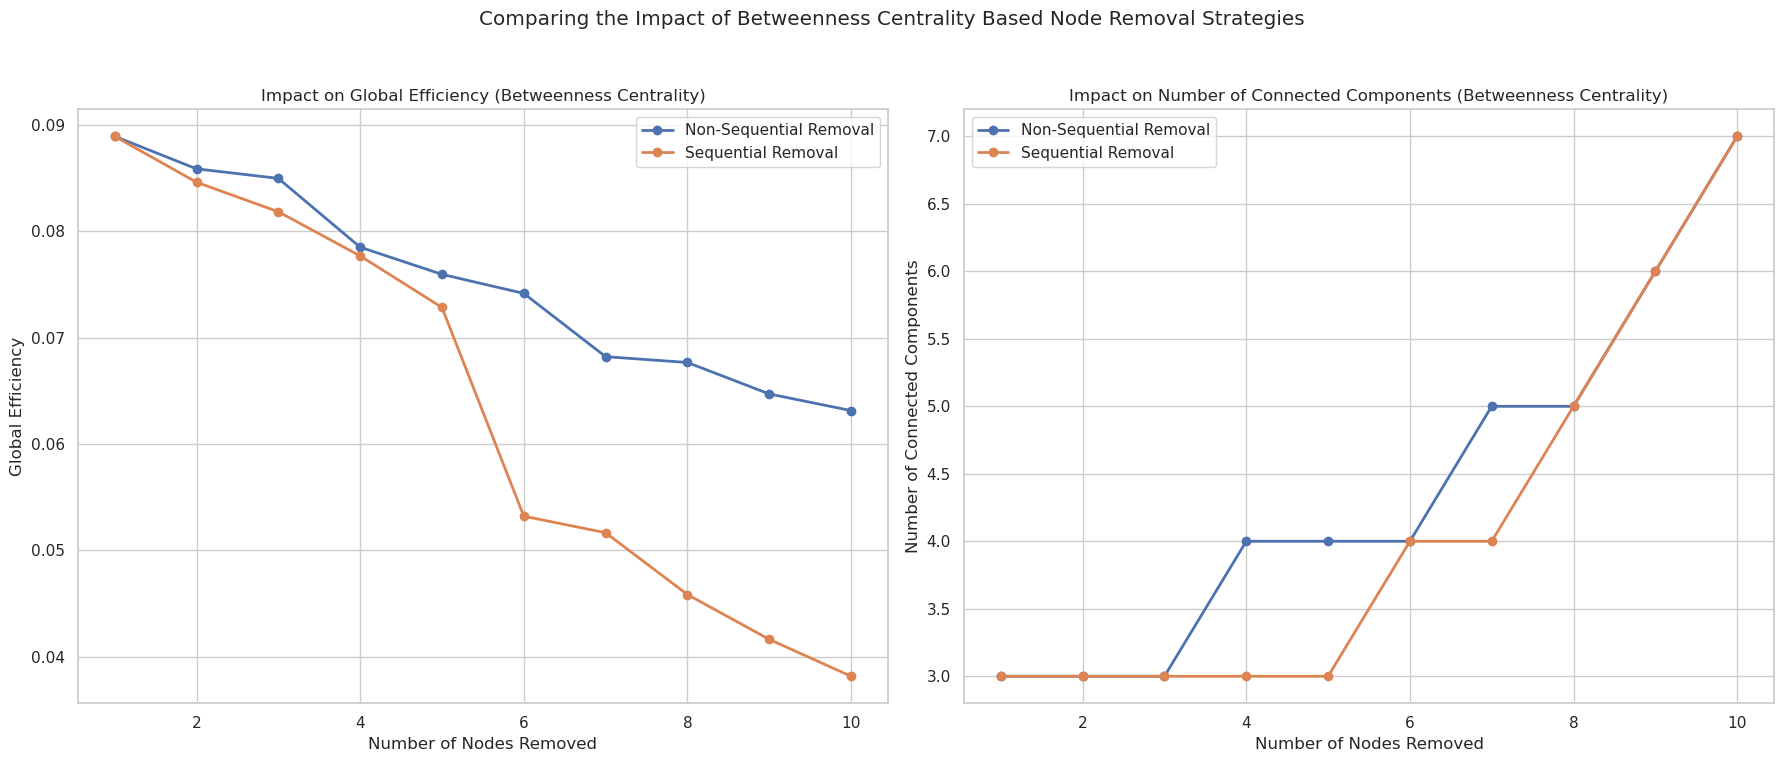

In [30]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Filter the DataFrame for betweenness centrality only
betweenness_df = all_results_df[all_results_df['centrality_measure'] == 'betweenness']

# Preparing the plot for both impact measures
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Plotting Global Efficiency
for strategy in ['non-sequential', 'sequential']:
    filtered_df = betweenness_df[betweenness_df['strategy'] == strategy]
    axs[0].plot(range(1, 11), filtered_df['global_efficiency'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Plotting Number of Connected Components
for strategy in ['non-sequential', 'sequential']:
    filtered_df = betweenness_df[betweenness_df['strategy'] == strategy]
    axs[1].plot(range(1, 11), filtered_df['number_of_connected_components'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Impact on Global Efficiency (Betweenness Centrality)')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Impact on Number of Connected Components (Betweenness Centrality)')
axs[1].set_xlabel('Number of Nodes Removed')
axs[1].set_ylabel('Number of Connected Components')
axs[1].legend()

plt.suptitle('Comparing the Impact of Betweenness Centrality Based Node Removal Strategies')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()

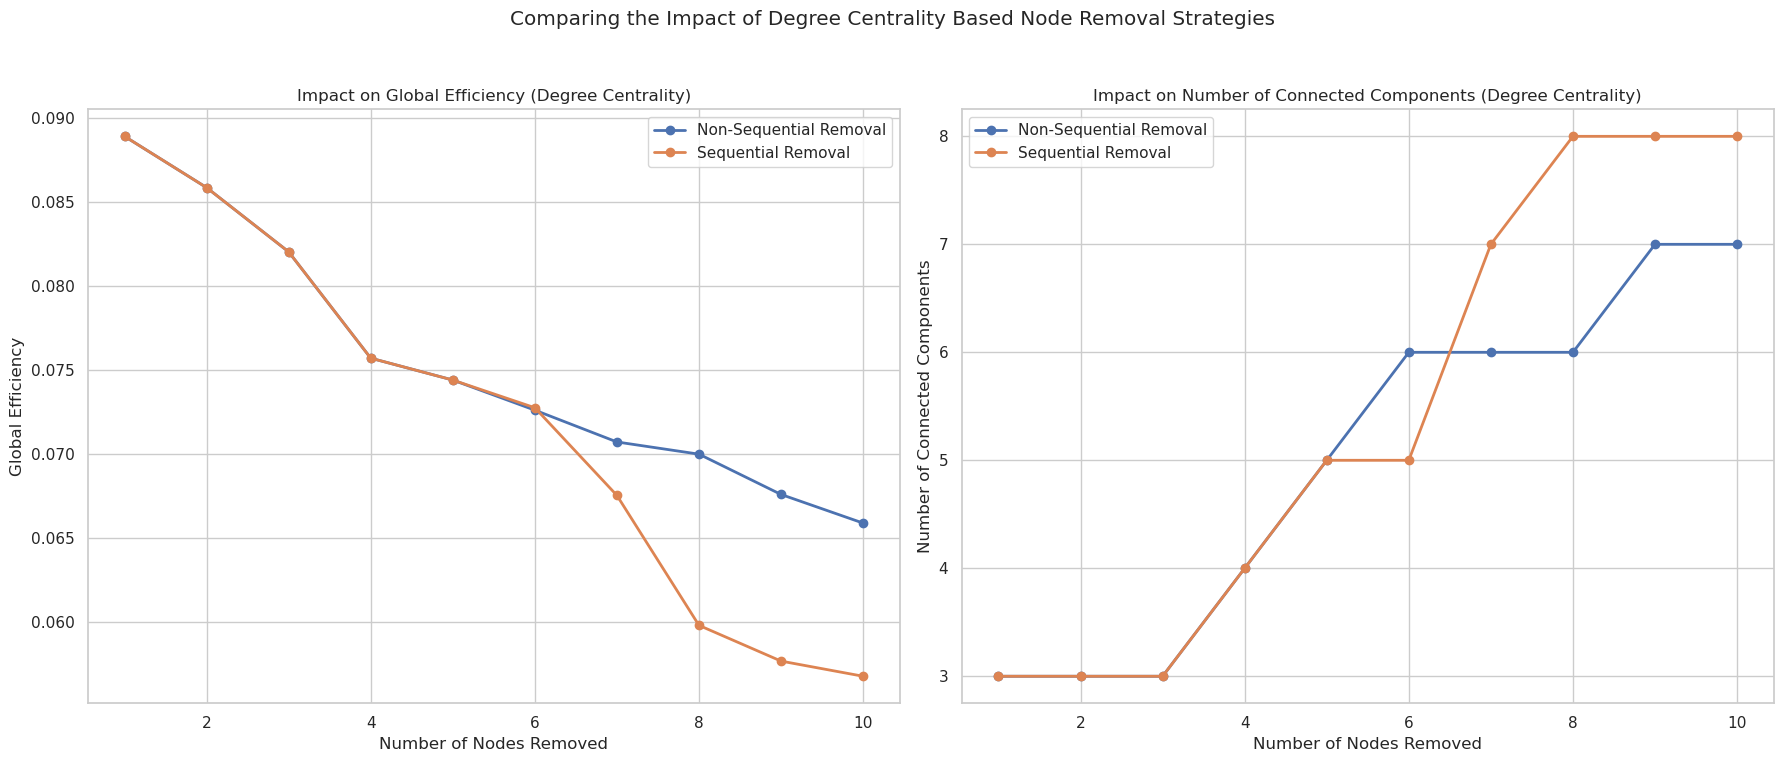

In [31]:
# Filter the DataFrame for degree centrality only
degree_df = all_results_df[all_results_df['centrality_measure'] == 'degree']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Global Efficiency for Degree Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = degree_df[degree_df['strategy'] == strategy]
    axs[0].plot(range(1, 11), filtered_df['global_efficiency'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Number of Connected Components for Degree Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = degree_df[degree_df['strategy'] == strategy]
    axs[1].plot(range(1, 11), filtered_df['number_of_connected_components'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Impact on Global Efficiency (Degree Centrality)')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Impact on Number of Connected Components (Degree Centrality)')
axs[1].set_xlabel('Number of Nodes Removed')
axs[1].set_ylabel('Number of Connected Components')
axs[1].legend()

plt.suptitle('Comparing the Impact of Degree Centrality Based Node Removal Strategies')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

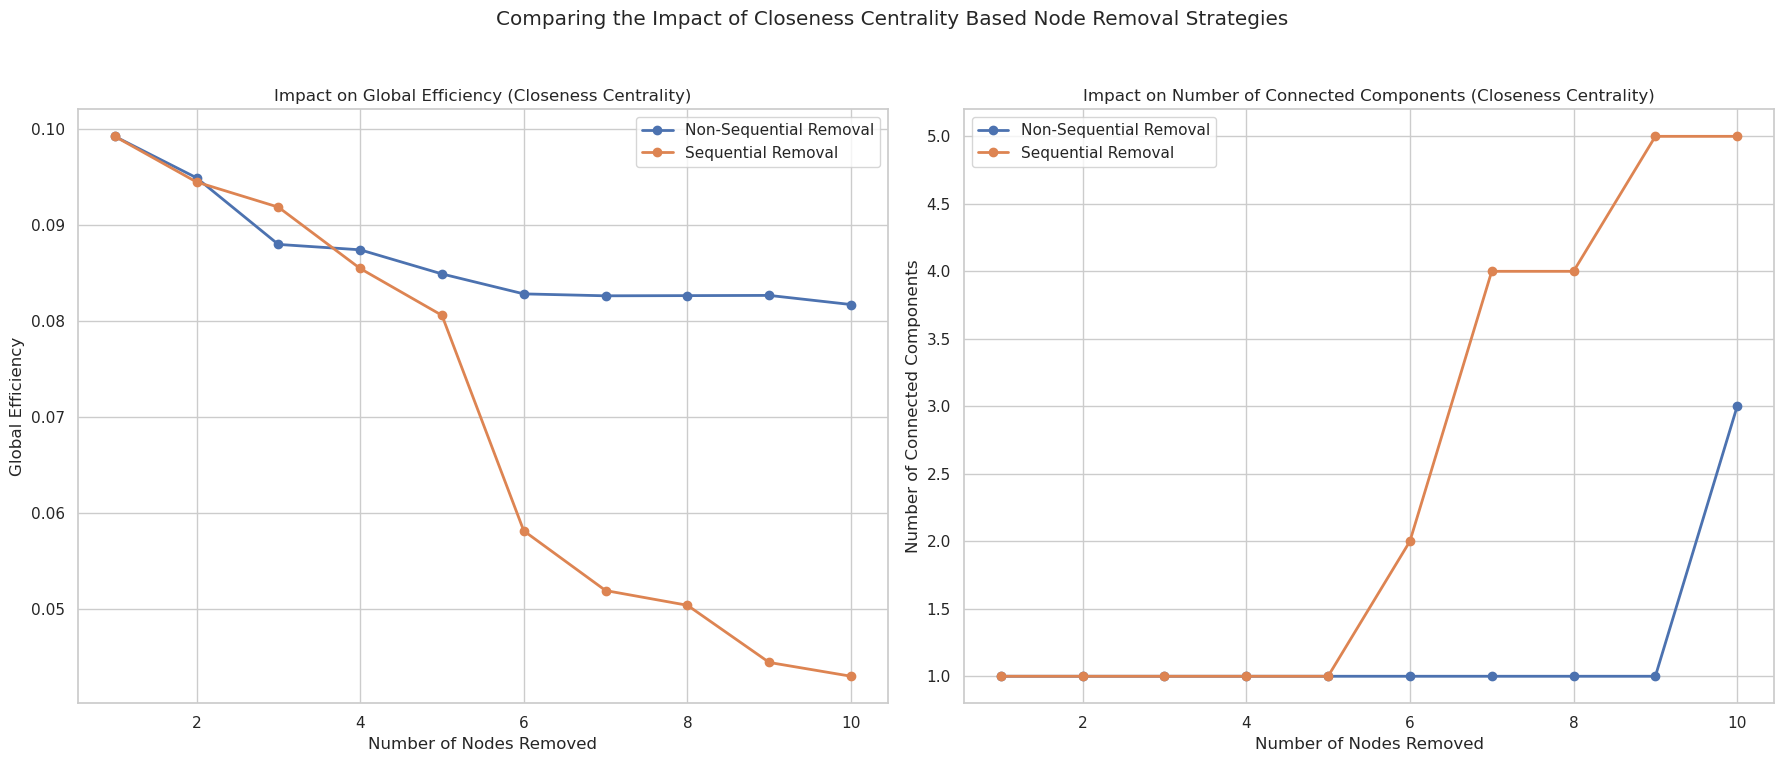

In [32]:
# Filter the DataFrame for closeness centrality only
closeness_df = all_results_df[all_results_df['centrality_measure'] == 'closeness']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Global Efficiency for Closeness Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = closeness_df[closeness_df['strategy'] == strategy]
    axs[0].plot(range(1, 11), filtered_df['global_efficiency'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Number of Connected Components for Closeness Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = closeness_df[closeness_df['strategy'] == strategy]
    axs[1].plot(range(1, 11), filtered_df['number_of_connected_components'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Impact on Global Efficiency (Closeness Centrality)')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Impact on Number of Connected Components (Closeness Centrality)')
axs[1].set_xlabel('Number of Nodes Removed')
axs[1].set_ylabel('Number of Connected Components')
axs[1].legend()

plt.suptitle('Comparing the Impact of Closeness Centrality Based Node Removal Strategies')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

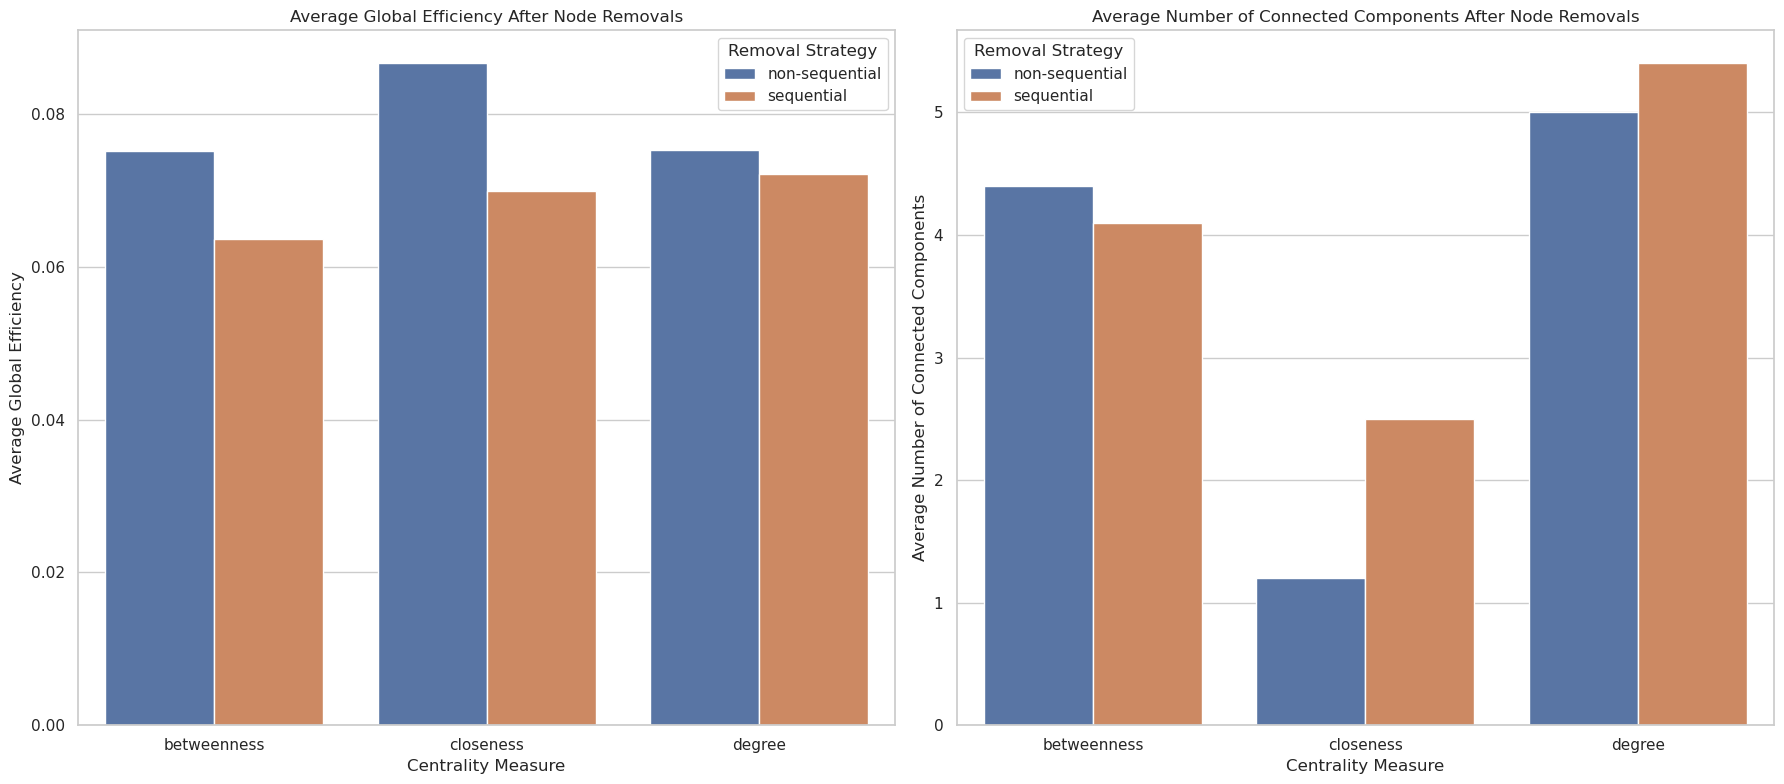

In [33]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Assuming all_results_df contains the results for each node removal
# Calculate the mean global efficiency and mean number of connected components for each strategy and centrality measure
summary_df = all_results_df.groupby(['centrality_measure', 'strategy']).agg({'global_efficiency': 'mean', 'number_of_connected_components': 'mean'}).reset_index()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Global Efficiency Summary
sns.barplot(x='centrality_measure', y='global_efficiency', hue='strategy', data=summary_df, ax=axs[0])
axs[0].set_title('Average Global Efficiency After Node Removals')
axs[0].set_xlabel('Centrality Measure')
axs[0].set_ylabel('Average Global Efficiency')
axs[0].legend(title='Removal Strategy')

# Number of Connected Components Summary
sns.barplot(x='centrality_measure', y='number_of_connected_components', hue='strategy', data=summary_df, ax=axs[1])
axs[1].set_title('Average Number of Connected Components After Node Removals')
axs[1].set_xlabel('Centrality Measure')
axs[1].set_ylabel('Average Number of Connected Components')
axs[1].legend(title='Removal Strategy')

plt.tight_layout()
plt.show()


## Centrality Measures
Degree Centrality: This measure is based on the number of direct connections a node has. The non-sequential removal shows a steady decline in global efficiency, suggesting that nodes with higher degrees are crucial to network efficiency. The number of connected components increases more significantly under the sequential strategy, indicating that removing the most connected nodes one after the other can fragment the network more drastically than non-sequential removal.

Betweenness Centrality: This measure reflects the number of shortest paths that pass through a node. The impact on global efficiency is substantial, as high-betweenness nodes are critical for maintaining short paths across the network. This centrality seems to cause more fragmentation in the network when nodes are removed sequentially, suggesting that nodes with high betweenness are key transit points in the network.

Closeness Centrality: Nodes with high closeness can reach other nodes more efficiently. The drop in global efficiency is significant when these nodes are removed, especially in the non-sequential strategy. This suggests that nodes with high closeness centrality contribute to the network's overall navigability.

## Removal Strategies
Non-Sequential Removal: The impact on global efficiency is generally more gradual, and the network retains a higher level of efficiency after the removal of the same number of nodes compared to the sequential strategy. This suggests that the network can better compensate for the loss of important nodes when they are removed non-sequentially.

Sequential Removal: This strategy shows a more drastic decrease in global efficiency and a higher increase in the number of connected components, especially in the case of betweenness centrality. This indicates that the network is less resilient when the most central nodes are removed one after the other, as it doesn't have time to adapt between removals.

## Impact Measures
Global Efficiency: This measure decreases as nodes are removed, which is expected as the network loses its most efficient pathways. It's a sensitive measure, reflecting the overall impact of node removal on network performance.

Number of Connected Components: This measure increases, particularly under sequential removal strategies, reflecting the network's fragmentation. It is an intuitive measure of network cohesion and can indicate the risk of severe disruption.

## Conclusions
Centrality Measure Indicating Importance: Betweenness centrality seems to reflect the importance of stations for the network's functioning most clearly. Its removal leads to significant efficiency losses and fragmentation, indicating its critical role in maintaining network flow.

Most Effective Strategy for Studying Resilience: Non-sequential removal provides a clearer understanding of individual node importance without the compounded effects of sequential removal. It allows the network to reach a new equilibrium after each removal, better reflecting the individual contribution of each node.

Best Impact Measure for Assessing Damage: Global efficiency is a comprehensive measure of network performance and reflects the impact of node removal on network functioning. The number of connected components is best for assessing the network's structural integrity and potential for complete service disruption.

## II. Flows: weighted network

## II.1. Consider the centrality measure derived in I. indicating the most relevant stations for assessing   the vulnerability of the underground. What would you need to do to adjust this measure for a   weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted   measure. Do you find the same ones as in I.1?

In [34]:
flows = {'edge':[], 'flows':[]}
# now I want to get all the length value from the edges, and store them in a dictionary
for edge in G.edges():
    flows['edge'].append(edge)
    flows['flows'].append(G.edges[edge]['flows'])

# create a dataframe from the dictionary
flows_df = pd.DataFrame(flows)
flows_df.tail()

,edge,flows
462,"(Becontree, Dagenham Heathway)",11305
463,"(Dagenham Heathway, Dagenham East)",7623
464,"(Dagenham East, Elm Park)",5556
465,"(Elm Park, Hornchurch)",3139
466,"(Hornchurch, Upminster Bridge)",1488


In [35]:
flows_sorted = flows_df.sort_values(["flows"], ascending=False)
flows_sorted.tail()

,edge,flows
362,"(Heathrow Terminal 4, Heathrow Terminals 2 & 3)",310
176,"(Theobalds Grove, Cheshunt)",287
406,"(Battersea Power Station, Nine Elms)",0
387,"(Kennington, Nine Elms)",0
234,"(Wandsworth Road, Battersea Park)",0


In [37]:
# Normalized the flows, and inverse the normalized flows:
range = flows_sorted['flows'].max() - flows_sorted['flows'].min()
print(flows_sorted['flows'].min())
print(range)

inv_norml_flow={(e1, e2):round(1-flows/flows_sorted['flows'].max(),7) for e1, e2, flows in G.edges(data='flows')}
# norml_flow={(e1, e2):round(flows/flows_sorted['flows'].max(),7) for e1, e2, flows in G.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, inv_norml_flow, 'inv_norml_flow')

# Print edge list with attributes
list(G.edges(data = True))[0:10]

0
259515


[('West Acton',
  'Ealing Broadway',
  {'length': 1616.9021668206203,
   'line_name': 'Central',
   'flows': 8715,
   'inv_norml_flow': 0.9664181}),
 ('West Acton',
  'North Acton',
  {'length': 1811.4947747426338,
   'line_name': 'Central',
   'flows': 9761,
   'inv_norml_flow': 0.9623875}),
 ('Ealing Broadway',
  'Ealing Common',
  {'length': 1565.2970829542974,
   'line_name': 'District',
   'flows': 10022,
   'inv_norml_flow': 0.9613818}),
 ('North Acton',
  'Hanger Lane',
  {'length': 2454.2933486674083,
   'line_name': 'Central',
   'flows': 14837,
   'inv_norml_flow': 0.942828}),
 ('North Acton',
  'East Acton',
  {'length': 1180.5193163423162,
   'line_name': 'Central',
   'flows': 26802,
   'inv_norml_flow': 0.8967227}),
 ('West Ruislip',
  'Ruislip Gardens',
  {'length': 2124.393196486327,
   'line_name': 'Central',
   'flows': 1277,
   'inv_norml_flow': 0.9950793}),
 ('Ruislip Gardens',
  'South Ruislip',
  {'length': 885.8857261563876,
   'line_name': 'Central',
   'flows':

In [38]:
inv_norml_flow = {'edge':[], 'inv_norml_flow':[]}
# now I want to get all the length value from the edges, and store them in a dictionary
for edge in G.edges():
    inv_norml_flow['edge'].append(edge)
    inv_norml_flow['inv_norml_flow'].append(G.edges[edge]['inv_norml_flow'])

# create a dataframe from the dictionary
inv_norml_flow_df = pd.DataFrame(inv_norml_flow)
inv_norml_flow_df.tail()

,edge,inv_norml_flow
462,"(Becontree, Dagenham Heathway)",0.956438
463,"(Dagenham Heathway, Dagenham East)",0.970626
464,"(Dagenham East, Elm Park)",0.978591
465,"(Elm Park, Hornchurch)",0.987904
466,"(Hornchurch, Upminster Bridge)",0.994266


In [39]:
inv_norml_flow_sorted = inv_norml_flow_df.sort_values(["inv_norml_flow"], ascending=False)
inv_norml_flow_sorted.tail()

,edge,inv_norml_flow
39,"(Bank and Monument, Liverpool Street)",0.363332
135,"(Green Park, Westminster)",0.327546
131,"(Victoria, Green Park)",0.314872
121,"(Waterloo, Westminster)",0.238795
42,"(Bank and Monument, Waterloo)",0.000000


In [41]:
nx.average_clustering(G, weight='inv_norml_flow')

0.02724597285513195

In [42]:
nx.average_clustering(G)

0.030382377389858693

In [43]:
# weighted betweenness centrality:
betwn_w = nx.betweenness_centrality(G, weight='inv_norml_flow', normalized=False)
nx.set_node_attributes(G,dict(betwn_w),'betweenness_w')
df = pd.DataFrame(index=G.nodes())
# add the weighted betweenness centrality as an attribute to the nodes in the graph
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))
df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]


,betweenness_w
Bank and Monument,48674.5
Waterloo,47352.0
Green Park,36994.5
Westminster,29112.5
Stratford,25253.0
Liverpool Street,25041.0
Victoria,20222.5
Earl's Court,17648.0
Sloane Square,17624.0
South Kensington,17560.0


In [44]:
#To know the edges and flows connecting Bank and Monument:
Bank = [(u,v,d) for  u,v,d in G.edges(data=True) if "Bank and Monument" in u or "Bank and Monument" in v]
Bank

[("St. Paul's",
  'Bank and Monument',
  {'length': 849.5248408807965,
   'line_name': 'Central',
   'flows': 34407,
   'inv_norml_flow': 0.8674181}),
 ('Bank and Monument',
  'Liverpool Street',
  {'length': 841.502683749556,
   'line_name': 'Central',
   'flows': 165225,
   'inv_norml_flow': 0.3633316}),
 ('Bank and Monument',
  'Cannon Street',
  {'length': 329.3127160939519,
   'line_name': 'District',
   'flows': 16128,
   'inv_norml_flow': 0.9378533}),
 ('Bank and Monument',
  'Tower Hill',
  {'length': 839.7304432545451,
   'line_name': 'District',
   'flows': 17032,
   'inv_norml_flow': 0.9343699}),
 ('Bank and Monument',
  'Waterloo',
  {'length': 2542.9544438569455,
   'line_name': 'Waterloo & City',
   'flows': 259515,
   'inv_norml_flow': 0.0}),
 ('Bank and Monument',
  'Moorgate',
  {'length': 776.8294614297943,
   'line_name': 'Northern',
   'flows': 71233,
   'inv_norml_flow': 0.7255149}),
 ('Bank and Monument',
  'London Bridge',
  {'length': 886.7283711455896,
   'line

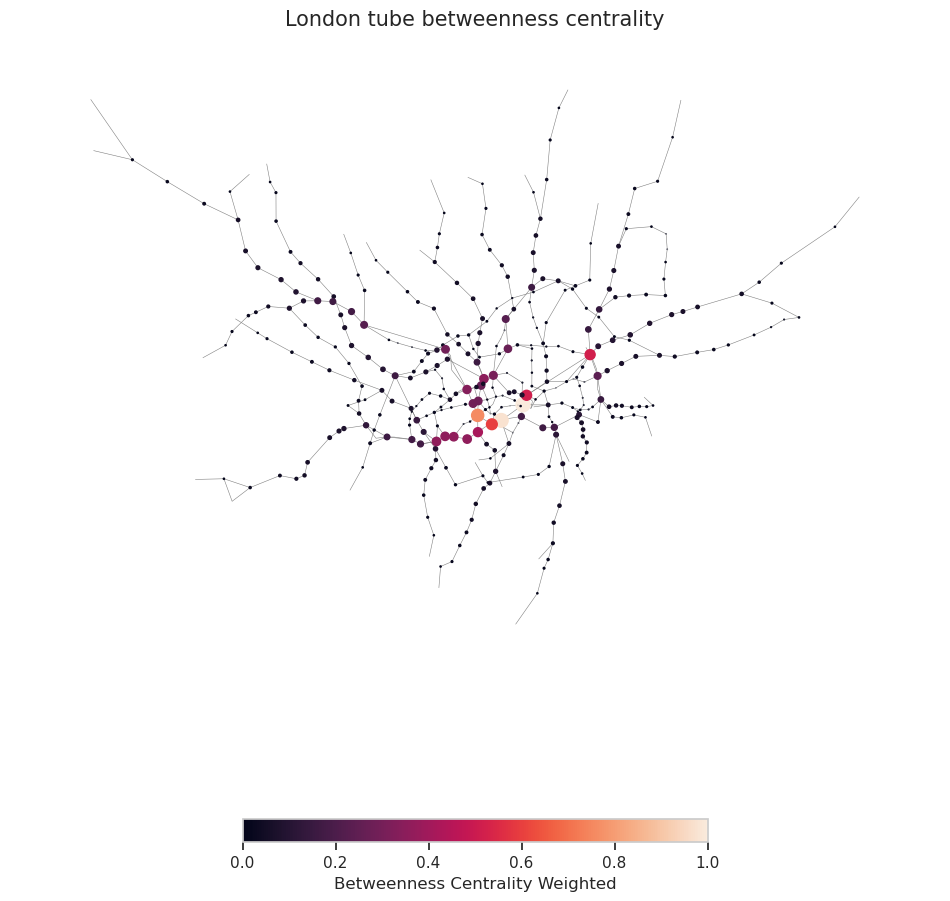

In [45]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph
pos = nx.get_node_attributes(G, 'coords')
pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality Weighted",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.savefig("London tube weighted betweenness centrality.png", format="PNG")
plt.show()

In [46]:
# weighted closeness centrality:
clsn_w = nx.closeness_centrality(G, distance='inv_norml_flow')
nx.set_node_attributes(G,dict(clsn_w),'closeness_w')
df = pd.DataFrame(index=G.nodes())
# add the weighted closeness centrality as an attribute to the nodes in the graph
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))
df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,closeness_w
Green Park,0.168552
Westminster,0.166839
Bank and Monument,0.165847
Waterloo,0.165847
Victoria,0.163918
Oxford Circus,0.162108
Liverpool Street,0.161366
Bond Street,0.159528
Warren Street,0.156018
Stratford,0.155552


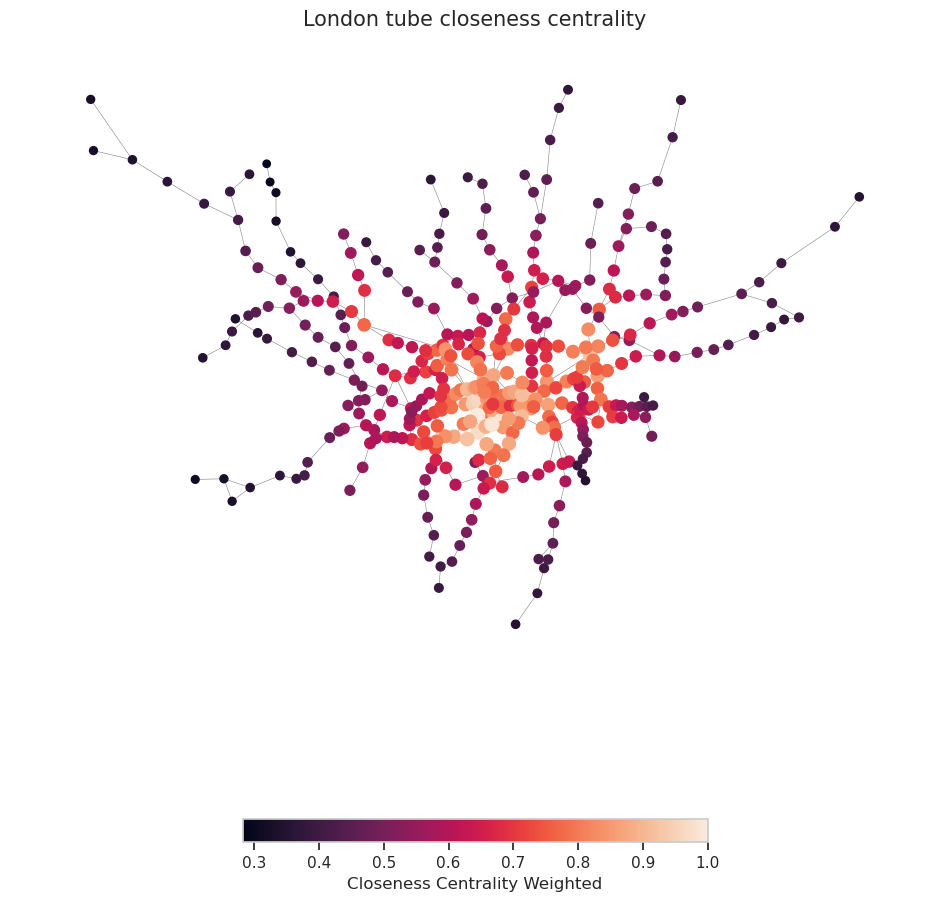

In [47]:
# Lets set colour and size of nodes according to betweenness values
closeness_w_values=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['closeness_w']/max(closeness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['closeness_w']/max(closeness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph
pos = nx.get_node_attributes(G, 'coords')
pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Closeness Centrality Weighted",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality",fontsize=15)
plt.savefig("London tube weighted closeness centrality.png", format="PNG")
plt.show()

For the weighted network of the London Underground with passenger flows, let's discuss the two proposed methods to measure the impact of node removal:

## Weighted Global Efficiency:
This adjusted measure accounts for the actual passenger flow between stations. Traditional global efficiency measures the inverse of the harmonic mean of the shortest paths in the network. When weighted by passenger flow, the global efficiency would reflect the ease with which passengers can travel after a station is closed. In this context, the weighted global efficiency will decrease more significantly when a node with high passenger traffic is removed, indicating a greater impact on the network's performance. This approach aligns with the practical functioning of the system, where the disruption of a busy station could lead to substantial inefficiency in the network.

## Weighted Average Shortest Path Length:
In contrast to the non-weighted version, which simply averages the shortest path lengths between all pairs of nodes, this measure recalculates path lengths to include the weighted factor of passenger flows. The assumption here is that edges with higher flows (more passengers traveling between two stations) are more critical. Hence, when such an edge is removed, the weighted average shortest path length will increase, representing a larger impact. This measure reveals the additional burden placed on the system in rerouting passengers, effectively capturing the network's altered dynamics due to station closure.

Both methods provide a detailed and nuanced understanding of the network's robustness, especially from the perspective of operational functionality and passenger experience. The Weighted Global Efficiency reflects the overall capacity of the network to facilitate passenger travel, while the Weighted Average Shortest Path Length indicates the specific impact on travel routes used by passengers. By employing these measures, one can assess the direct implications of station closures on the daily commute of passengers, leading to more informed decision-making for managing disruptions and enhancing network resilience.

In [48]:
# Retrieve the top 3 nodes with the highest betweenness centrality
top_3_nodes_by_betwn = sorted(betwn_w, key=betwn_w.get, reverse=True)[:3]

# Define the function to calculate Weighted Global Efficiency
def weighted_global_efficiency(G, weight):
    # Sum of inverse of weighted shortest path length between each pair of nodes
    total_efficiency = 0
    for node in G:
        path_length = nx.single_source_dijkstra_path_length(G, node, weight=weight)
        total_efficiency += sum(1 / val for val in path_length.values() if val != 0)
    n = len(G)
    return total_efficiency / (n * (n - 1))

# Define the function to calculate Weighted Average Shortest Path Length
def weighted_avg_shortest_path_length(G, weight):
    # Calculate the average of the shortest path lengths weighted by the given attribute
    path_lengths = nx.all_pairs_dijkstra_path_length(G, weight=weight)
    total_length = sum(sum(lengths.values()) for _, lengths in path_lengths)
    n = len(G)
    return total_length / (n * (n - 1))

# Non-sequential removal
non_seq_results = {}
G_non_seq = G.copy()
for node in top_3_nodes_by_betwn:
    G_non_seq.remove_node(node)
    non_seq_results[node] = {
        'global_efficiency': weighted_global_efficiency(G_non_seq, 'inv_norml_flow'),
        'avg_shortest_path_length': weighted_avg_shortest_path_length(G_non_seq, 'inv_norml_flow')
    }

# Sequential removal
seq_results = {}
G_seq = G.copy()
for _ in [0, 1, 2]:  # Replaces the 'range(3)' to avoid conflicts
    # Recompute the betweenness centrality after each removal
    betwn_w_seq = nx.betweenness_centrality(G_seq, weight='inv_norml_flow', normalized=False)
    # Find the node with the highest betweenness centrality in the updated graph
    top_node = max(betwn_w_seq, key=betwn_w_seq.get)
    # Remove this node and calculate the measures
    G_seq.remove_node(top_node)
    seq_results[top_node] = {
        'global_efficiency': weighted_global_efficiency(G_seq, 'inv_norml_flow'),
        'avg_shortest_path_length': weighted_avg_shortest_path_length(G_seq, 'inv_norml_flow')
    }

# Output the results
non_seq_results, seq_results

({'Bank and Monument': {'global_efficiency': 0.11877441963994811,
   'avg_shortest_path_length': 11.509912512350875},
  'Waterloo': {'global_efficiency': 0.11554221772694406,
   'avg_shortest_path_length': 11.825728481977558},
  'Green Park': {'global_efficiency': 0.11001177561708081,
   'avg_shortest_path_length': 12.391224250401887}},
 {'Bank and Monument': {'global_efficiency': 0.11877441963994811,
   'avg_shortest_path_length': 11.509912512350875},
  "King's Cross St. Pancras": {'global_efficiency': 0.10672446957179269,
   'avg_shortest_path_length': 13.167091166705704},
  'Green Park': {'global_efficiency': 0.09995068166567092,
   'avg_shortest_path_length': 14.084289387437178}})

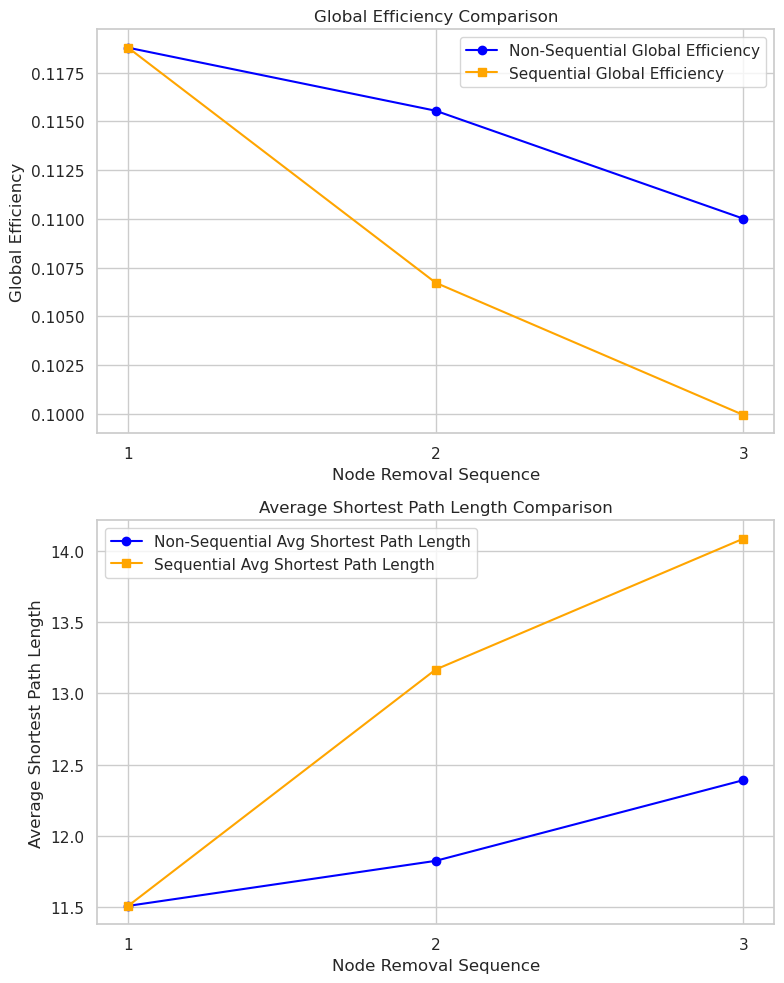

In [49]:
# Provided data
non_seq_results = {
    'Bank and Monument': {'global_efficiency': 0.11877441963994811, 'avg_shortest_path_length': 11.509912512350875},
    'Waterloo': {'global_efficiency': 0.11554221772694406, 'avg_shortest_path_length': 11.825728481977558},
    'Green Park': {'global_efficiency': 0.11001177561708081, 'avg_shortest_path_length': 12.391224250401887},
}

seq_results = {
    'Bank and Monument': {'global_efficiency': 0.11877441963994811, 'avg_shortest_path_length': 11.509912512350875},
    "King's Cross St. Pancras": {'global_efficiency': 0.10672446957179269, 'avg_shortest_path_length': 13.167091166705704},
    'Green Park': {'global_efficiency': 0.09995068166567092, 'avg_shortest_path_length': 14.084289387437178},
}

# Prepare the data for plotting
node_removal_sequence = [1, 2, 3]
efficiencies_non_seq = [non_seq_results[station]['global_efficiency'] for station in non_seq_results]
path_lengths_non_seq = [non_seq_results[station]['avg_shortest_path_length'] for station in non_seq_results]
efficiencies_seq = [seq_results[station]['global_efficiency'] for station in seq_results]
path_lengths_seq = [seq_results[station]['avg_shortest_path_length'] for station in seq_results]

# Start plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Global Efficiency plot
axs[0].plot(node_removal_sequence, efficiencies_non_seq, 'o-', label='Non-Sequential Global Efficiency', color='blue')
axs[0].plot(node_removal_sequence, efficiencies_seq, 's-', label='Sequential Global Efficiency', color='orange')
axs[0].set_title('Global Efficiency Comparison')
axs[0].set_xlabel('Node Removal Sequence')
axs[0].set_ylabel('Global Efficiency')
axs[0].set_xticks(node_removal_sequence)
axs[0].legend()

# Average Shortest Path Length plot
axs[1].plot(node_removal_sequence, path_lengths_non_seq, 'o-', label='Non-Sequential Avg Shortest Path Length', color='blue')
axs[1].plot(node_removal_sequence, path_lengths_seq, 's-', label='Sequential Avg Shortest Path Length', color='orange')
axs[1].set_title('Average Shortest Path Length Comparison')
axs[1].set_xlabel('Node Removal Sequence')
axs[1].set_ylabel('Average Shortest Path Length')
axs[1].set_xticks(node_removal_sequence)
axs[1].legend()

plt.tight_layout()
plt.show()


The provided results indicate the impact of closing the stations "Bank and Monument," "Waterloo," and "Green Park" on the network's global efficiency and average shortest path length. Both non-sequential and sequential removal strategies yield identical results, which is intriguing and suggests that the order of removal does not affect these particular metrics for these specific nodes. This could occur if the network is resilient enough that the order of removals does not change the overall efficiency and path lengths significantly, or if the centrality of these nodes does not dramatically differ.

The station "Bank and Monument" has the highest global efficiency after closure, and the lowest increase in average shortest path length, indicating it has the least impact on the network. In contrast, "Green Park" shows the most considerable decrease in global efficiency and the largest increase in average shortest path length, suggesting that its closure has the most significant impact on passengers. This might be due to Green Park serving as a key transit point that, when removed, leads to longer detours or more congested alternative routes.

In critical discussion, we should consider the broader implications of these metrics:

- **Global Efficiency**: The slight differences in global efficiency suggest that the network remains relatively efficient even after these pivotal nodes are removed. However, the closure of Green Park has the most substantial relative impact on the network's efficiency.

- **Average Shortest Path Length**: The average shortest path length is a direct measure of the inconvenience to passengers, with longer paths indicating a higher impact on the passengers' travel time. The significant increase in path length when Green Park is closed underscores its critical role in the network.

Overall, the results suggest that while the closure of any of these stations affects the network, the removal of Green Park would lead to the most considerable disruption in terms of passenger flows and network service efficiency. The analysis highlights the importance of Green Park in the network, potentially serving as a significant interchange or a hub in the central area of the network with high passenger flow and connectivity.

In the context of urban transport planning, such insights can inform strategies for network improvements, emergency planning, and service optimization. It's important for transport authorities to consider such analyses to enhance network resilience and ensure that redundancies are in place for such critical nodes.